# Data Gathering, Preprocessing and Analysis
---

## Importing Libraries


In [42]:
import pandas as pd
import json
import requests
import tqdm
import time
from requests.exceptions import ConnectionError, HTTPError
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Dataset Description
Description of the available columns in the dataset:
- **realSum:** The total price of the Airbnb listing. (Numeric)
- **room_type:** The type of room being offered (e.g. private, shared, etc.). (Categorical)
- **room_shared:** Whether the room is shared or not. (Boolean)
- **room_private:** Whether the room is private or not. (Boolean)
- **person_capacity:** The maximum number of people that can stay in the room. (Numeric)
- **host_is_superhost:** Whether the host is a superhost or not. (Boolean)
- **multi:** Whether the listing is for multiple rooms or not. (Boolean)
- **biz:** Whether the listing is for business purposes or not. (Boolean)
- **cleanliness_rating:** The cleanliness rating of the listing. (Numeric)
- **guest_satisfaction_overall:** The overall guest satisfaction rating of the listing. (Numeric)
- **bedrooms:** The number of bedrooms in the listing. (Numeric)
- **dist:** The distance from the city center. (Numeric)
- **metro_dist:** The distance from the nearest metro station. (Numeric)
- **attr_index:** attraction index of the listing location (Numeric)
- **attr_index_norm:** 0-100 normalized attraction index (Numeric)
- **rest_index:** restaurant index of the listing location (Numeric)
- **rest_index_norm:** 0-100 normalized restaurant index (Numeric)
- **lng:** The longitude of the listing. (Numeric)
- **lat:** The latitude of the listing. (Numeric)
- **city:** The city of the listing. (Categorical)
- **time_of_week:** Whether the listing is for weekdays or the weekend. (Boolean)

In [43]:
raw_dataset_path = "./Dataset/Raw-Dataset/"
processed_dataset_path = "./Dataset/Processed-Dataset/"

amsterdam_weekday_dataset = raw_dataset_path + "amsterdam_weekdays.csv"

amsterdam_weekday_dataset_pandas = pd.read_csv(amsterdam_weekday_dataset)
amsterdam_weekday_dataset_pandas.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,0.000000,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,275.500000,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,551.000000,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,826.500000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


In [44]:
amsterdam_weekday_dataset_pandas.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


## What Extra Fields are needed?
- **district**: The district of the listing. (Categorical). We need this listing so that we can do comparisions between districts within the same city.
- **new Dataset which contains landmarks in each district**: This dataset will contain the landmarks in each district of the city. This dataset will be then used as part of the algorithm to rank each of the listings based on the landmarks in the district.

In [45]:
amsterdam_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "amsterdam_weekends.csv")
athens_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "athens_weekdays.csv")
athens_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "athens_weekends.csv")
barcelona_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "barcelona_weekdays.csv")
barcelona_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "barcelona_weekends.csv")
berlin_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "berlin_weekdays.csv")
berlin_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "berlin_weekends.csv")
budapest_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "budapest_weekdays.csv")
budapest_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "budapest_weekends.csv")
lisbon_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "lisbon_weekdays.csv")
lisbon_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "lisbon_weekends.csv")
london_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "london_weekdays.csv")
london_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "london_weekends.csv")
paris_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "paris_weekdays.csv")
paris_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "paris_weekends.csv")
rome_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "rome_weekdays.csv")
rome_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "rome_weekends.csv")
vienna_weekday_dataset_pandas = pd.read_csv(raw_dataset_path + "vienna_weekdays.csv")
vienna_weekend_dataset_pandas = pd.read_csv(raw_dataset_path + "vienna_weekends.csv")

list_of_cities_weekend = [amsterdam_weekend_dataset_pandas, athens_weekend_dataset_pandas, barcelona_weekend_dataset_pandas, berlin_weekend_dataset_pandas, budapest_weekend_dataset_pandas, lisbon_weekend_dataset_pandas, london_weekend_dataset_pandas, paris_weekend_dataset_pandas, rome_weekend_dataset_pandas, vienna_weekend_dataset_pandas]

list_of_cities_weekday = [amsterdam_weekday_dataset_pandas, athens_weekday_dataset_pandas, barcelona_weekday_dataset_pandas, berlin_weekday_dataset_pandas, budapest_weekday_dataset_pandas, lisbon_weekday_dataset_pandas, london_weekday_dataset_pandas, paris_weekday_dataset_pandas, rome_weekday_dataset_pandas, vienna_weekday_dataset_pandas]

city_names = ["amsterdam", "athens", "barcelona", "berlin", "budapest", "lisbon", "london", "paris", "rome", "vienna"]

## Getting District Information for each Listing
Getting Information such as
- What is District is the listing in?

In [ ]:
import requests
from tqdm import tqdm


city = "amsterdam"
panda = amsterdam_weekend_dataset_pandas
print("Processing city: " + city_names[i])
panda['district'] = "Unknown"

for index, row in tqdm(panda.iterrows(), total=panda.shape[0]):
    latitude = str(row['lat'])
    longitude = str(row['lng'])
    coordinate_key = (latitude, longitude)
    base_url = "http://localhost:8080/reverse"
    
    headers = {
    "User-Agent": "EurobnbInsights/1.0 (contact@yourdomain.com)" 
    }
    
    # Make the API request
    params = {
        "lat": latitude,
        "lon": longitude,
        "format": "json",
        "addressdetails": 1
    }
    
    
    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        # Extract district or neighborhood information
        address = data.get('address', {})
        suburb = address.get('suburb', None)
        neighborhood = address.get('neighbourhood', None)
        quarter = address.get('quarter', None)
        borough = address.get('borough', None)
        
        if city in ["amsterdam", "budapest", "paris", "vienna"]:
            panda.at[index, 'district'] = suburb
        elif city in ["athens", "lisbon"]:
            panda.at[index, 'district'] = neighborhood
        elif city in ["barcelona", "rome"]:
            panda.at[index, 'district'] = quarter
        elif city in ["berlin", "london"]:
            panda.at[index, 'district'] = borough

panda.to_csv(processed_dataset_path + city + "_weekends.csv", index=False)

# Get all the unique district names
district_names = panda['district'].unique()
print("Unique districts: ", len(district_names))
print("District names: ", district_names)
print("\n")



Processing city: amsterdam


Processing Batches:   2%|▏         | 17/975 [00:16<15:19,  1.04it/s]


KeyboardInterrupt: 

In [38]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

# Initialize the geolocator with a user agent
geolocator = Nominatim(user_agent="my_geopy_app")

# Cache to store results for unique coordinates
location_cache = {}

for i, panda in enumerate(list_of_cities_weekend):
    city = city_names[i]
    print("Processing city: " + city_names[i])
    panda['district'] = "Unknown"
    
    for index, row in tqdm(panda.iterrows(), total=panda.shape[0]):
        latitude = str(row['lat'])
        longitude = str(row['lng'])
        coordinate_key = (latitude, longitude)
        
        # Check if the coordinate is already in the cache
        if coordinate_key in location_cache:
            address = location_cache[coordinate_key]
        else:
            # Make the API call and cache the result
            try:
                location = geolocator.reverse(latitude + "," + longitude, timeout=10)
                address = location.raw['address']
                location_cache[coordinate_key] = address
            except Exception as e:
                print(f"Error fetching location for {coordinate_key}: {e}")
                continue
        
        # Extract district information based on the city
        suburb = address.get('suburb', "")
        neighbourhood = address.get('neighbourhood', "")
        quarter = address.get('quarter', "")
        borough = address.get('borough', "")
        
        if city in ["amsterdam", "budapest", "paris", "vienna"]:
            panda.at[index, 'district'] = suburb
        elif city in ["athens", "lisbon"]:
            panda.at[index, 'district'] = neighbourhood
        elif city in ["barcelona", "rome"]:
            panda.at[index, 'district'] = quarter
        elif city in ["berlin", "london"]:
            panda.at[index, 'district'] = borough
    
    # Save the updated dataset
    panda.to_csv(processed_dataset_path + city + "_weekends.csv", index=False)

Processing city: amsterdam


100%|██████████| 977/977 [16:19<00:00,  1.00s/it]


Processing city: athens


100%|██████████| 2627/2627 [40:28<00:00,  1.08it/s] 


Processing city: barcelona


100%|██████████| 1278/1278 [20:56<00:00,  1.02it/s]


Processing city: berlin


100%|██████████| 1200/1200 [19:37<00:00,  1.02it/s]


Processing city: budapest


100%|██████████| 1948/1948 [30:24<00:00,  1.07it/s]


Processing city: lisbon


100%|██████████| 2906/2906 [42:53<00:00,  1.13it/s]


Processing city: london


 63%|██████▎   | 3368/5379 [54:54<33:51,  1.01s/it]  

Error fetching location for ('51.5094', '9e-05'): Must be a coordinate pair or Point


 81%|████████▏ | 4373/5379 [1:11:17<10:05,  1.66it/s]

Error fetching location for ('51.48671', '-2e-05'): Must be a coordinate pair or Point


100%|██████████| 5379/5379 [1:27:38<00:00,  1.02it/s]


Processing city: paris


100%|██████████| 3558/3558 [57:28<00:00,  1.03it/s] 


Processing city: rome


100%|██████████| 4535/4535 [1:07:06<00:00,  1.13it/s]


Processing city: vienna


100%|██████████| 1799/1799 [29:01<00:00,  1.03it/s]


In [24]:
# Google API Setup
googleapi = json.load(open('secrets.json'))
googleapi = googleapi["secret"]

In [28]:
# Function to make a request with retries
def make_request_with_retries(url, backoff_factor=0.3):
    while True:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for HTTP errors
            return response
        except (ConnectionError, HTTPError) as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(backoff_factor)


In [29]:
# Iterate over the rows of the dataframe for Weekends
for i, panda in enumerate(list_of_cities_weekend):
    city = city_names[i]
    print("Processing city: " + city_names[i])
    panda['district'] = "Unknown"
    for index, row in tqdm.tqdm(panda.iterrows(), total=panda.shape[0], desc="Processing rows", leave=True):
        latitute = row['lat']
        longitude = row['lng']
        request_api = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={latitute:.6f},{longitude:.6f}&key={googleapi}"
        
        # Make the request with retries
        response = make_request_with_retries(request_api)
        response_json = response.json()
        
        # Get the District / Neighbourhood
        district = "Unknown"
        if city in ["amsterdam", "barcelona", "berlin", "budapest", "paris", "rome", "vienna"]:
            for result in response_json['results']:
                for address_component in result['address_components']:
                    if 'sublocality' in address_component['types'] or "sublocality_level_1" in address_component['types']:
                        district = address_component['long_name']
                        break
        elif city in ["athens", "lisbon", "london"]:
            for result in response_json['results']:
                for address_component in result['address_components']:
                    if 'administrative_area_level_3' in address_component['types']:
                        district = address_component['long_name']
                        break
        
        # Add the district to the dataframe
        panda.at[index, 'district'] = district
    
    # Save the dataframe
    path = processed_dataset_path + city_names[i] + "_weekends.csv"
    panda.to_csv(path, index=False)
    break
    

Processing city: amsterdam


Processing rows: 100%|██████████| 977/977 [03:28<00:00,  4.69it/s]


In [46]:
amsterdam_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "amsterdam_weekends.csv")
athens_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "athens_weekends.csv")
barcelona_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "barcelona_weekends.csv")
berlin_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "berlin_weekends.csv")
budapest_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "budapest_weekends.csv")
lisbon_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "lisbon_weekends.csv")
london_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "london_weekends.csv")
paris_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "paris_weekends.csv")
rome_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "rome_weekends.csv")
vienna_weekend_dataset_pandas = pd.read_csv(processed_dataset_path + "vienna_weekends.csv")

In [47]:
# Print out all the unique Districts for each city
print("Unique Districts for Amsterdam")
print(amsterdam_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Athens")
print(athens_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Barcelona")
print(barcelona_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Berlin")
print(berlin_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Budapest")
print(budapest_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Lisbon")
print(lisbon_weekend_dataset_pandas['district'].unique())
print("Unique Districts for London")
print(london_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Paris")
print(paris_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Rome")
print(rome_weekend_dataset_pandas['district'].unique())
print("Unique Districts for Vienna")
print(vienna_weekend_dataset_pandas['district'].unique())

Unique Districts for Amsterdam
['Zuid' 'Oost' 'Centrum' 'Westpoort' 'West' 'Noord' 'Nieuw-West'
 'Zuidoost' nan]
Unique Districts for Athens
['Ακαδημία' 'Τρείς Γέφυρες' 'Μουσείο' 'Πλατεία Αμερικής' 'Λυκαβηττός' nan
 'Monastiràki' 'Ομόνοια' 'Ψυρρή' 'Πλατεία Βάθης' 'Λόφος Σκουζέ'
 'Κεραμεικός' 'Νεάπολη' 'Άγιος Παντελεήμονας' 'Κουντουριώτικα' 'Πευκάκια'
 'Θυμαράκια' 'Άγιος Νικόλαος' 'Ρηγίλλης' 'Μεταξουργείο' 'Σταθμός Λαρίσης'
 'Πλατεία Κολιάτσου' 'Αττική' 'Άγιος Ελευθέριος' 'Προφήτης Δανιήλ' 'Γκάζι'
 'Θησείο' 'Κουκάκι' 'Αστεροσκοπείο' 'Ακρόπολη' 'Μακρυγιάννη'
 'Άγιος Αρτέμιος' 'Κυνοσάργους' 'Γαργαρέττα' 'Μετς' 'Ασύρματος'
 'Φιλοπάππου' 'Άγιος Ιωάννης' 'Γουδή' 'Αμπελόκηποι' 'Ερυθρός Σταυρός'
 'Γηροκομείο' 'Ελληνορώσων']
Unique Districts for Barcelona
["la Dreta de l'Eixample" "la Nova Esquerra de l'Eixample" 'el Raval' nan
 'el Gòtic' 'la Sagrada Família' 'el Parc i la Llacuna del Poblenou'
 'el Poble-sec' 'la Vila de Gràcia' 'la Barceloneta' 'Sant Antoni'
 'Gràcia Nova' 'la Vila Olímpica 

In [48]:
# Add the Districts also for the Weekdays Dataset
raw_dataset_path = "./Dataset/Raw-Dataset/"
processed_dataset_path = "./Dataset/Processed-Dataset/"
for city in city_names:
    weekday_city_dataset = pd.read_csv(raw_dataset_path + city + "_weekdays.csv")
    weekend_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekends.csv")
    print("City: " + city)
    print(raw_dataset_path + city + "_weekdays.csv")
    print(processed_dataset_path + city + "_weekends.csv")
    # print("Weekday Dataset Shape: " + str(weekday_city_dataset.shape))
    # print("Weekend Dataset Shape: " + str(weekend_city_dataset.shape))
    
    weekday_city_dataset['district'] = "Unknown"
    for i, r in tqdm.tqdm(weekday_city_dataset.iterrows(), total=weekday_city_dataset.shape[0], desc="Processing rows", leave=True):
        for index, row in weekend_city_dataset.iterrows():
            if math.isclose(row['lat'], r['lat'], abs_tol=1e-5) and math.isclose(row['lng'], r['lng'], abs_tol=1e-5):
                weekday_city_dataset.at[i, 'district'] = row['district']
                break


    
    # Drop the rows with 
    weekday_city_dataset = weekday_city_dataset[weekday_city_dataset['district'] != "Unknown"]
    
    path = processed_dataset_path + city + "_weekdays.csv"
    weekday_city_dataset.to_csv(path, index=False)
    weekday_city_dataset = pd.read_csv(path)
    print("Weekday Dataset Shape: " + str(weekday_city_dataset.shape))
    print("Weekend Dataset Shape: " + str(weekend_city_dataset.shape))
    print("\n")

City: amsterdam
./Dataset/Raw-Dataset/amsterdam_weekdays.csv
./Dataset/Processed-Dataset/amsterdam_weekends.csv


Processing rows: 100%|██████████| 1103/1103 [00:10<00:00, 100.87it/s]


Weekday Dataset Shape: (712, 21)
Weekend Dataset Shape: (977, 21)


City: athens
./Dataset/Raw-Dataset/athens_weekdays.csv
./Dataset/Processed-Dataset/athens_weekends.csv


Processing rows: 100%|██████████| 2653/2653 [01:05<00:00, 40.66it/s]


Weekday Dataset Shape: (2121, 21)
Weekend Dataset Shape: (2627, 21)


City: barcelona
./Dataset/Raw-Dataset/barcelona_weekdays.csv
./Dataset/Processed-Dataset/barcelona_weekends.csv


Processing rows: 100%|██████████| 1555/1555 [00:21<00:00, 71.75it/s]


Weekday Dataset Shape: (968, 21)
Weekend Dataset Shape: (1278, 21)


City: berlin
./Dataset/Raw-Dataset/berlin_weekdays.csv
./Dataset/Processed-Dataset/berlin_weekends.csv


Processing rows: 100%|██████████| 1284/1284 [00:15<00:00, 84.15it/s]


Weekday Dataset Shape: (957, 21)
Weekend Dataset Shape: (1200, 21)


City: budapest
./Dataset/Raw-Dataset/budapest_weekdays.csv
./Dataset/Processed-Dataset/budapest_weekends.csv


Processing rows: 100%|██████████| 2074/2074 [00:40<00:00, 50.71it/s]


Weekday Dataset Shape: (1395, 21)
Weekend Dataset Shape: (1948, 21)


City: lisbon
./Dataset/Raw-Dataset/lisbon_weekdays.csv
./Dataset/Processed-Dataset/lisbon_weekends.csv


Processing rows: 100%|██████████| 2857/2857 [01:17<00:00, 36.94it/s]


Weekday Dataset Shape: (2244, 21)
Weekend Dataset Shape: (2906, 21)


City: london
./Dataset/Raw-Dataset/london_weekdays.csv
./Dataset/Processed-Dataset/london_weekends.csv


Processing rows: 100%|██████████| 4614/4614 [03:33<00:00, 21.61it/s]


Weekday Dataset Shape: (4012, 21)
Weekend Dataset Shape: (5379, 21)


City: paris
./Dataset/Raw-Dataset/paris_weekdays.csv
./Dataset/Processed-Dataset/paris_weekends.csv


Processing rows: 100%|██████████| 3130/3130 [01:40<00:00, 31.21it/s]


Weekday Dataset Shape: (2610, 21)
Weekend Dataset Shape: (3558, 21)


City: rome
./Dataset/Raw-Dataset/rome_weekdays.csv
./Dataset/Processed-Dataset/rome_weekends.csv


Processing rows: 100%|██████████| 4492/4492 [03:04<00:00, 24.29it/s]


Weekday Dataset Shape: (3515, 21)
Weekend Dataset Shape: (4535, 21)


City: vienna
./Dataset/Raw-Dataset/vienna_weekdays.csv
./Dataset/Processed-Dataset/vienna_weekends.csv


Processing rows: 100%|██████████| 1738/1738 [00:29<00:00, 59.36it/s]

Weekday Dataset Shape: (1380, 21)
Weekend Dataset Shape: (1799, 21)




## Making Sure that a Listing is in both the Weekend and Weekday Dataset

In [49]:
# Remove the Listings which are not in the Weekdays for Weekends
for city in tqdm.tqdm(city_names, desc="Processing Cities", leave=True):
    weekend_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekends.csv")
    weekday_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekdays.csv")
    
    # Merge the datasets on 'lat' and 'lng' to keep only the matching rows
    merged_dataset = pd.merge(weekend_city_dataset, weekday_city_dataset, on=['lat', 'lng'], suffixes=('_weekend', '_weekday'))
    
    # Extract the relevant columns for weekends and weekdays
    weekend_city_dataset = merged_dataset[[col for col in merged_dataset.columns if col.endswith('_weekend') or col in ['lat', 'lng']]]
    weekday_city_dataset = merged_dataset[[col for col in merged_dataset.columns if col.endswith('_weekday') or col in ['lat', 'lng']]]
    
    # Rename the columns to remove the suffixes
    weekend_city_dataset.columns = [col.replace('_weekend', '') for col in weekend_city_dataset.columns]
    weekday_city_dataset.columns = [col.replace('_weekday', '') for col in weekday_city_dataset.columns]
    
    # Reorder the columns of weekday_city_dataset
    column_order = ['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
                    'person_capacity', 'host_is_superhost', 'multi', 'biz',
                    'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
                    'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
                    'rest_index_norm', 'lng', 'lat', 'district']
    weekday_city_dataset = weekday_city_dataset.reindex(columns=column_order)
    
    print(f"City: {city}")
    print(f"Weekend Dataset Shape: {weekend_city_dataset.shape}")
    print(f"Weekday Dataset Shape: {weekday_city_dataset.shape}")
    
    # Save the datasets
    weekend_city_dataset.to_csv(processed_dataset_path + city + "_weekends.csv", index=False)
    weekday_city_dataset.to_csv(processed_dataset_path + city + "_weekdays.csv", index=False)
    print("\n")

Processing Cities:  20%|██        | 2/10 [00:00<00:00, 12.32it/s]

City: amsterdam
Weekend Dataset Shape: (717, 21)
Weekday Dataset Shape: (717, 21)


City: athens
Weekend Dataset Shape: (2901, 21)
Weekday Dataset Shape: (2901, 21)


City: barcelona
Weekend Dataset Shape: (1013, 21)
Weekday Dataset Shape: (1013, 21)


City: berlin
Weekend Dataset Shape: (1050, 21)
Weekday Dataset Shape: (1050, 21)


Processing Cities:  50%|█████     | 5/10 [00:00<00:00, 15.88it/s]



City: budapest
Weekend Dataset Shape: (1721, 21)
Weekday Dataset Shape: (1721, 21)


City: lisbon
Weekend Dataset Shape: (3878, 21)
Weekday Dataset Shape: (3878, 21)


Processing Cities:  70%|███████   | 7/10 [00:00<00:00, 10.11it/s]



City: london
Weekend Dataset Shape: (4592, 21)
Weekday Dataset Shape: (4592, 21)


City: paris
Weekend Dataset Shape: (3476, 21)
Weekday Dataset Shape: (3476, 21)


Processing Cities:  90%|█████████ | 9/10 [00:00<00:00,  8.25it/s]



City: rome
Weekend Dataset Shape: (5331, 21)
Weekday Dataset Shape: (5331, 21)




Processing Cities: 100%|██████████| 10/10 [00:01<00:00,  9.78it/s]

City: vienna
Weekend Dataset Shape: (1647, 21)
Weekday Dataset Shape: (1647, 21)




## Distribution of Listings in each District in a City

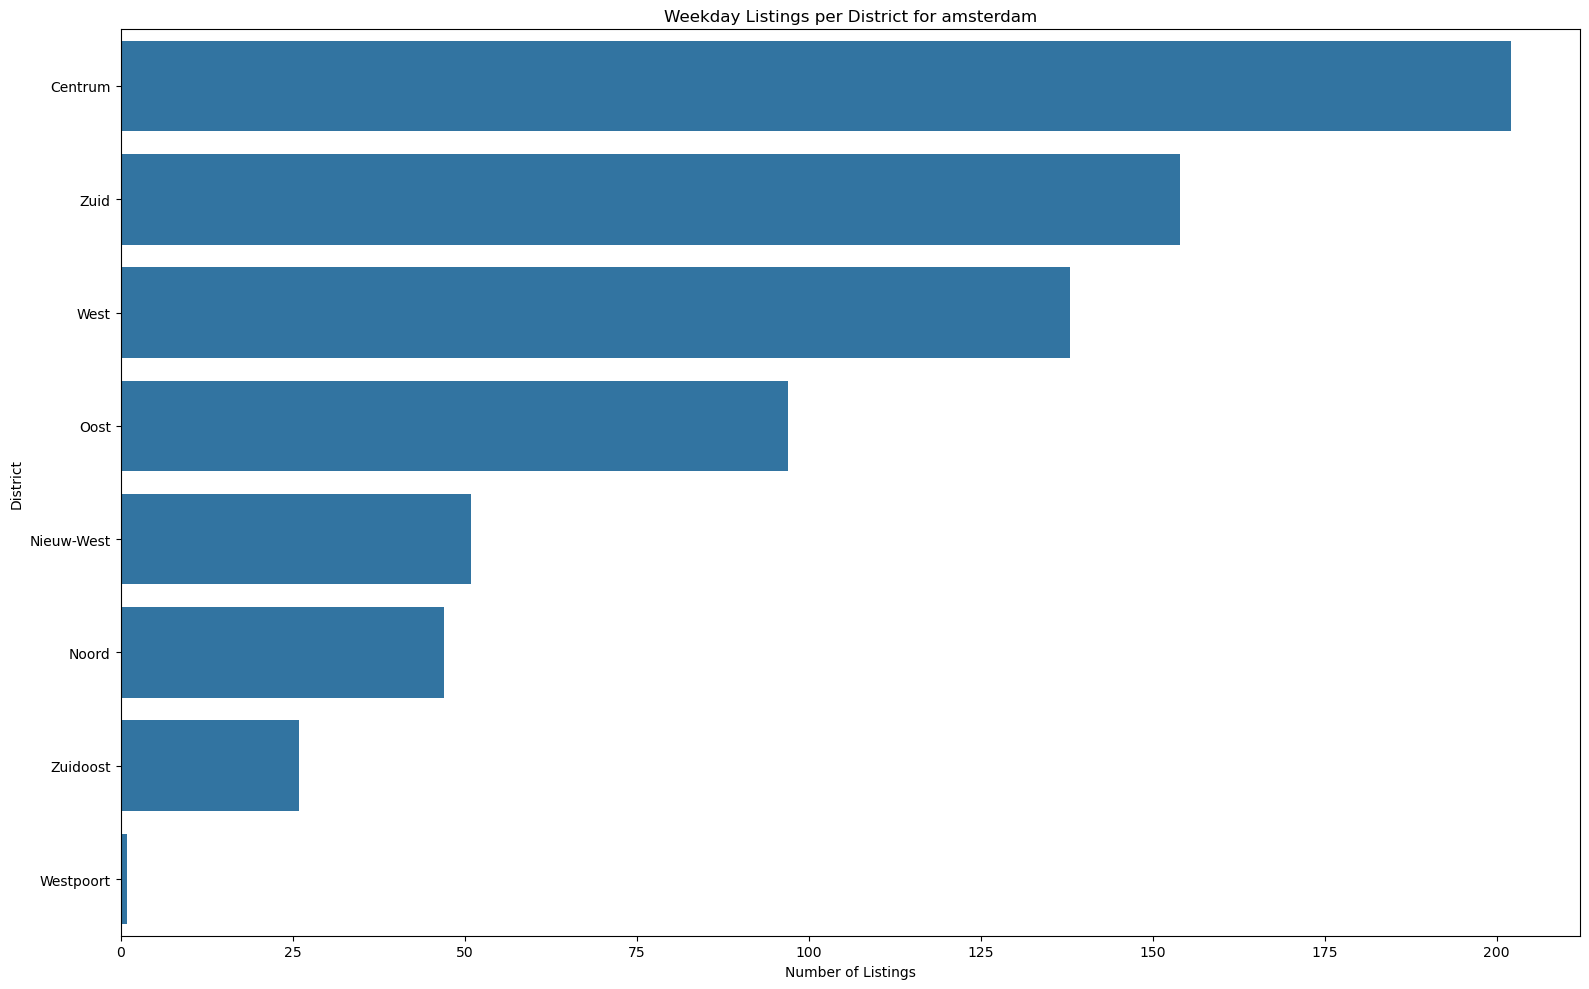

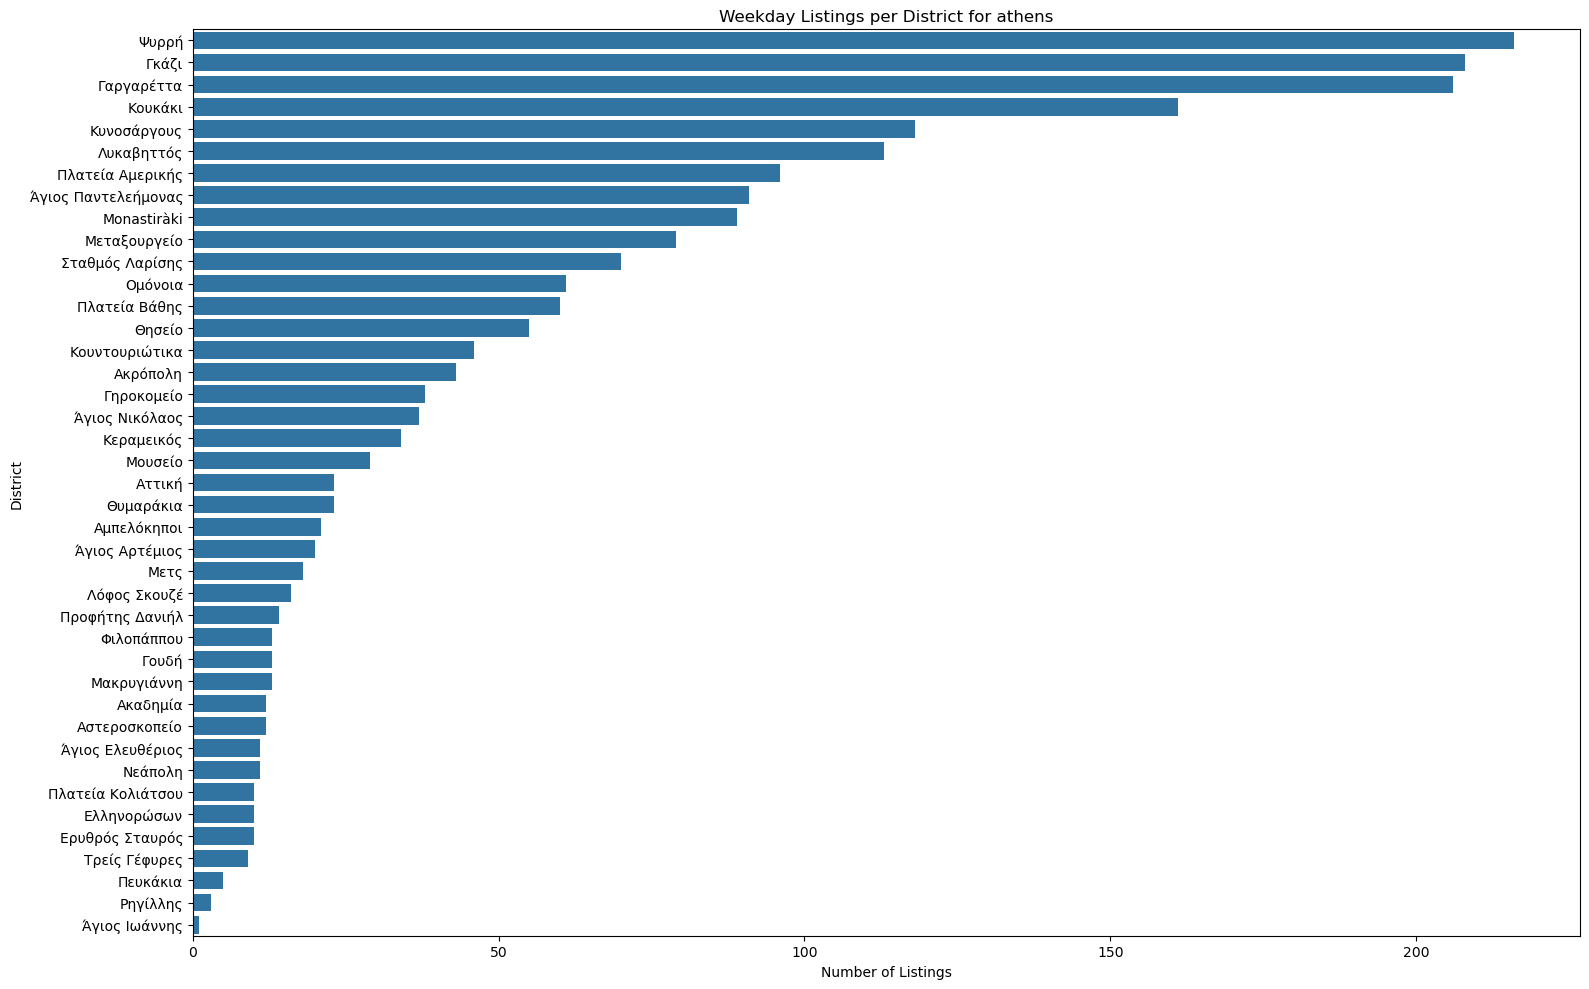

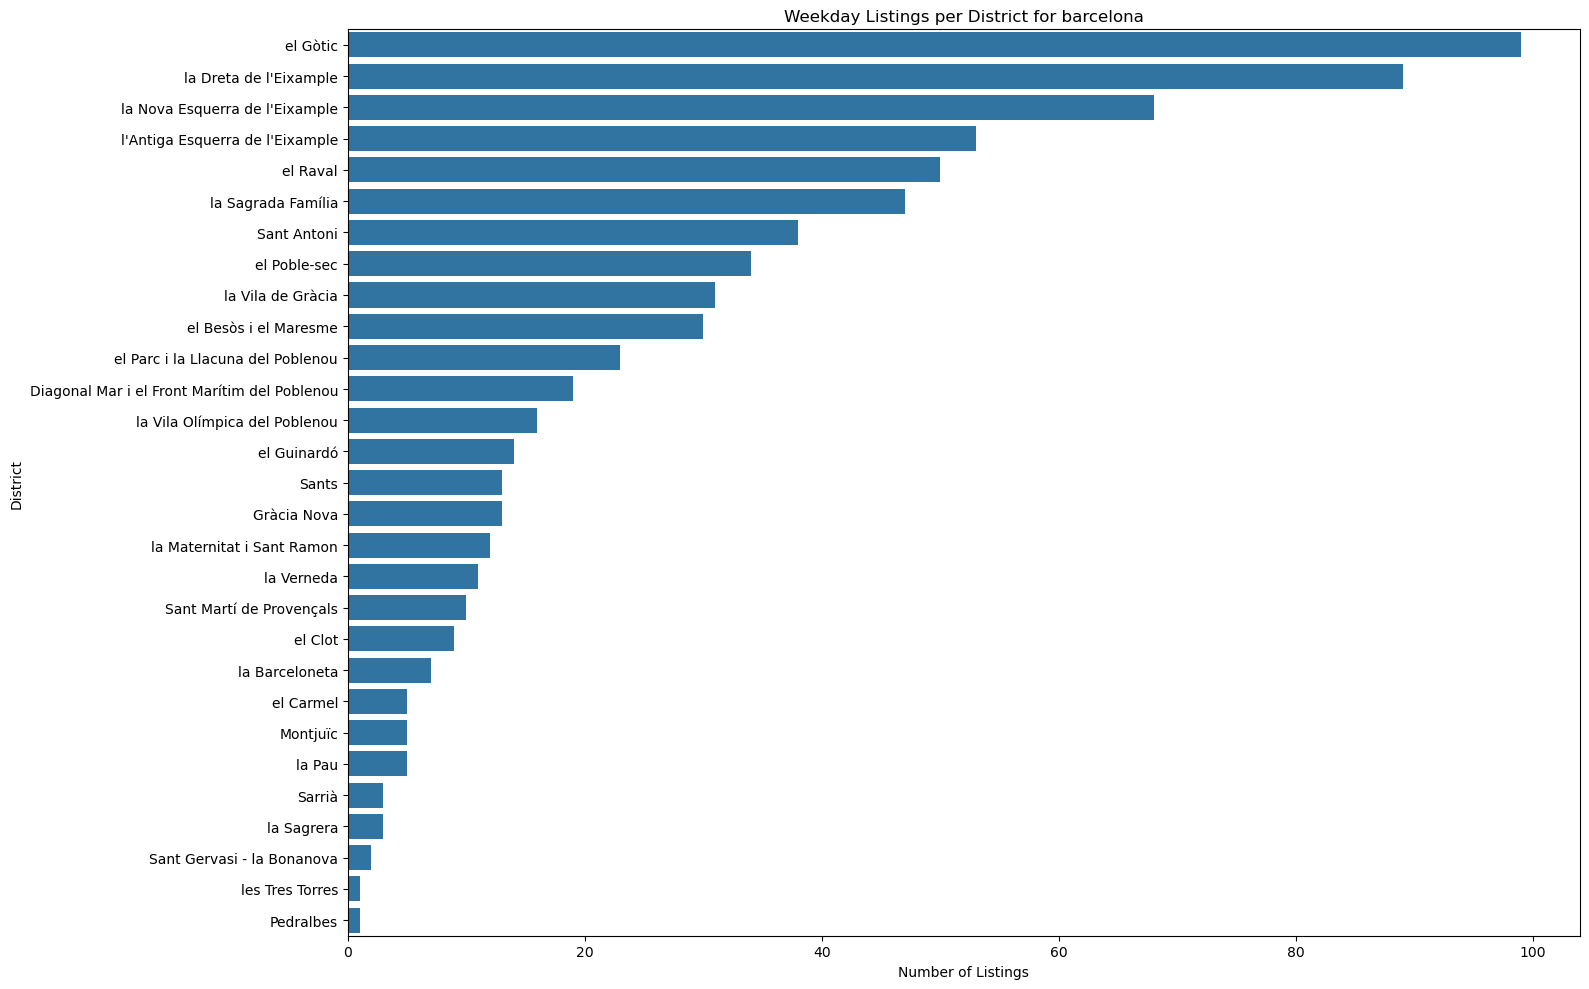

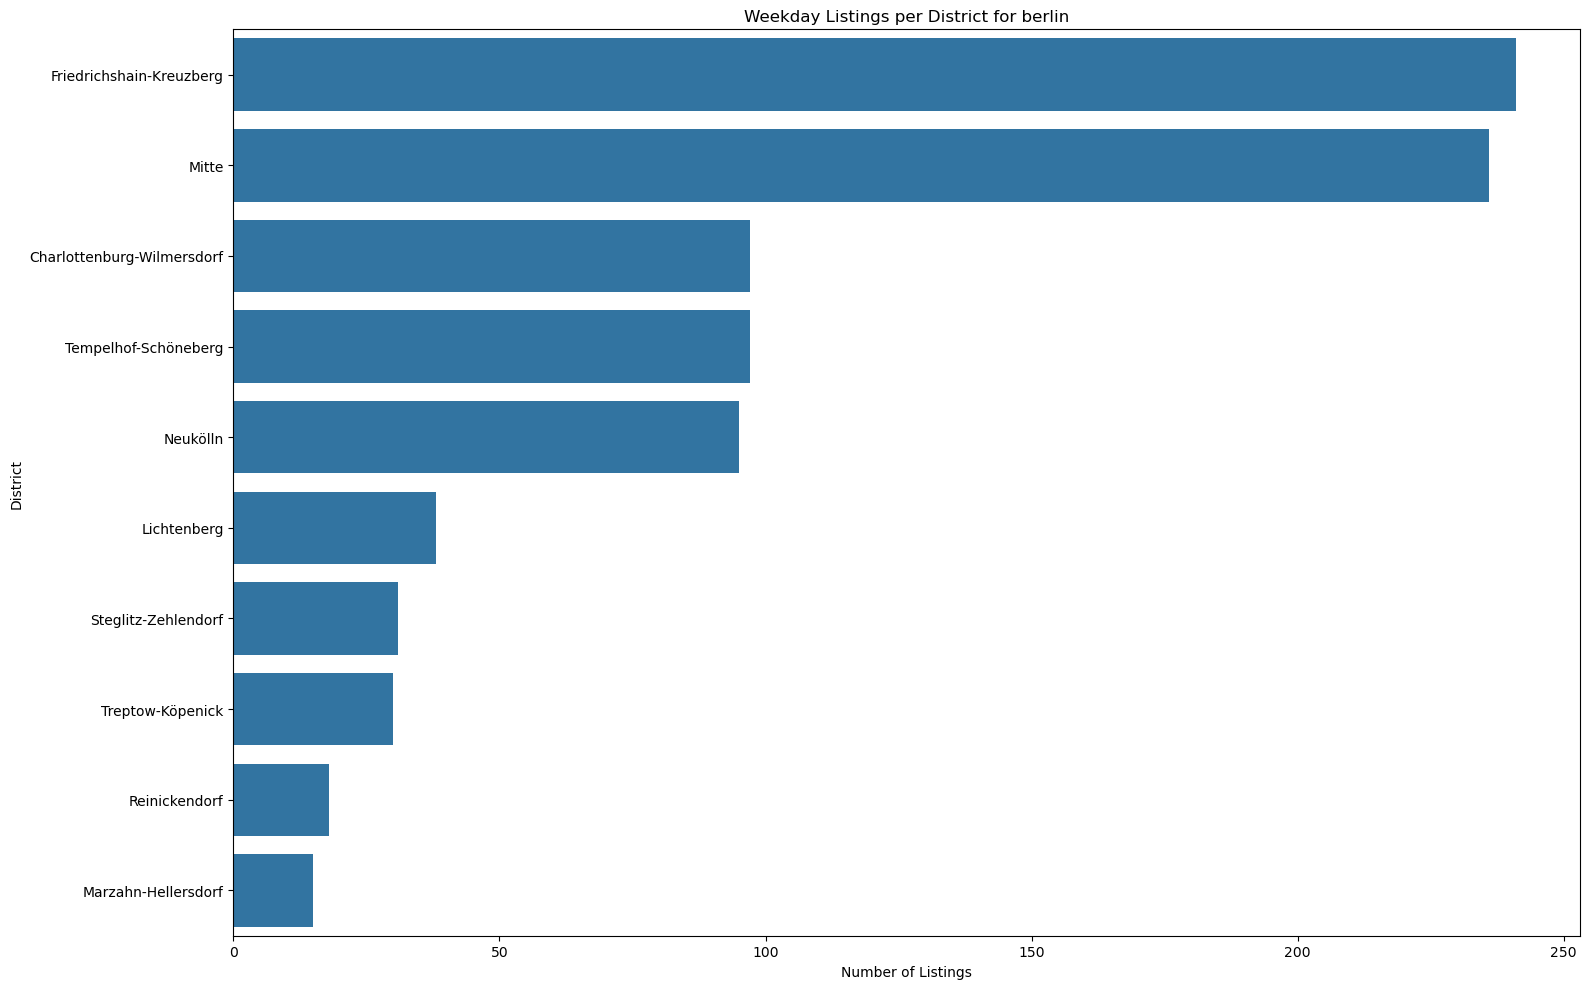

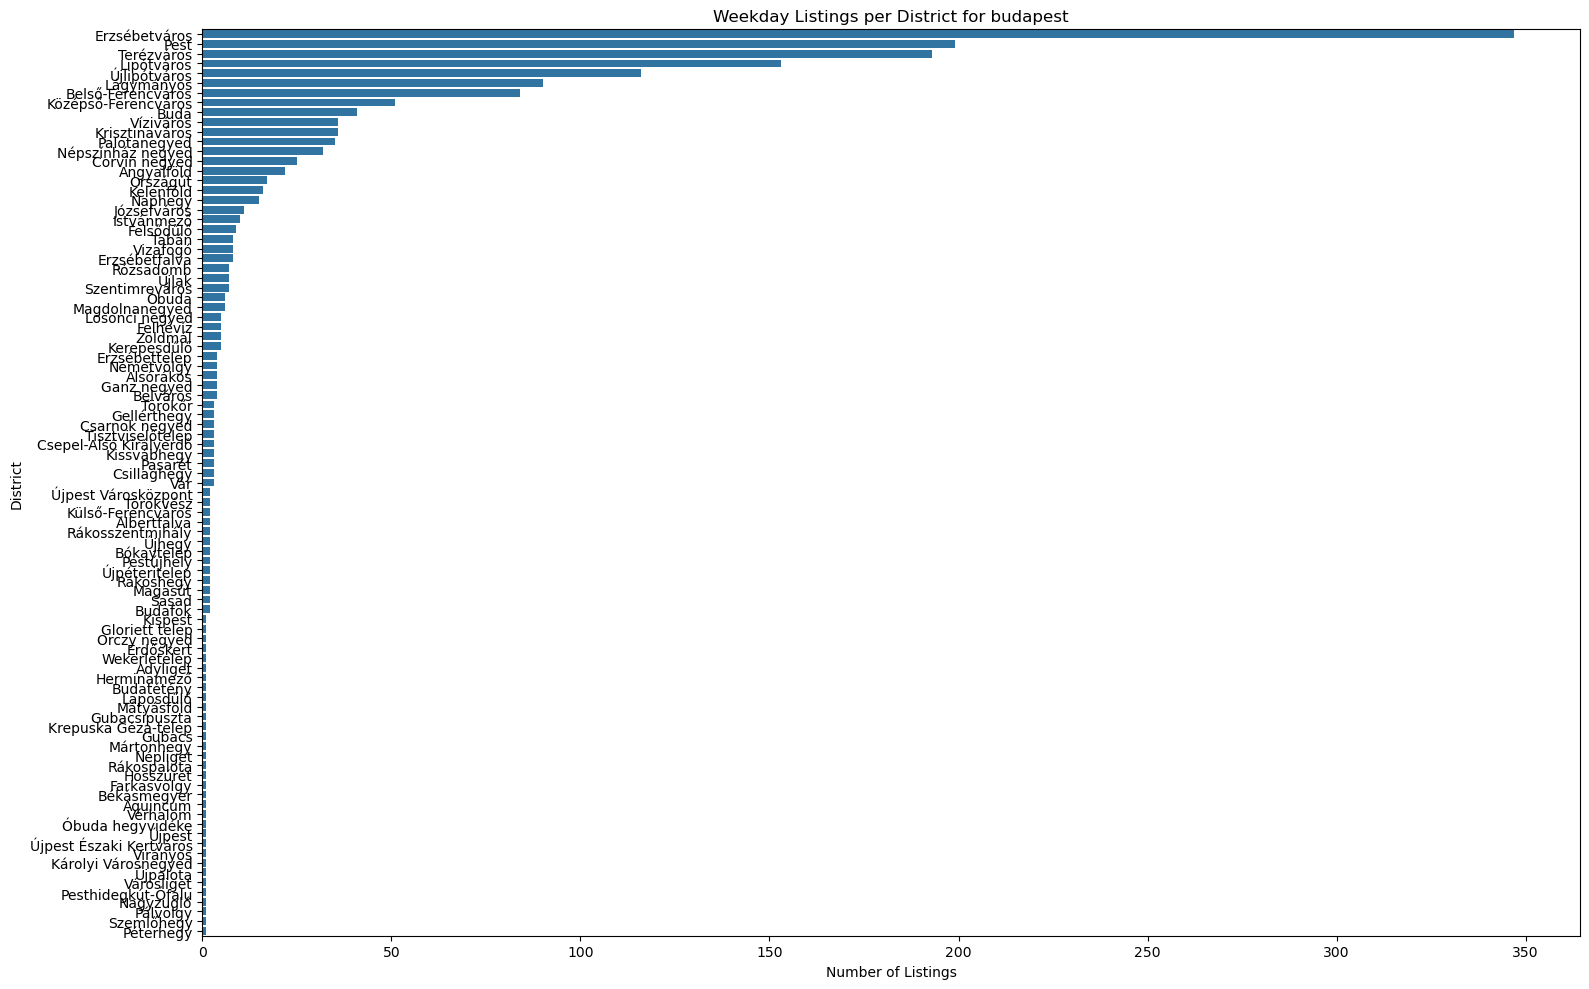

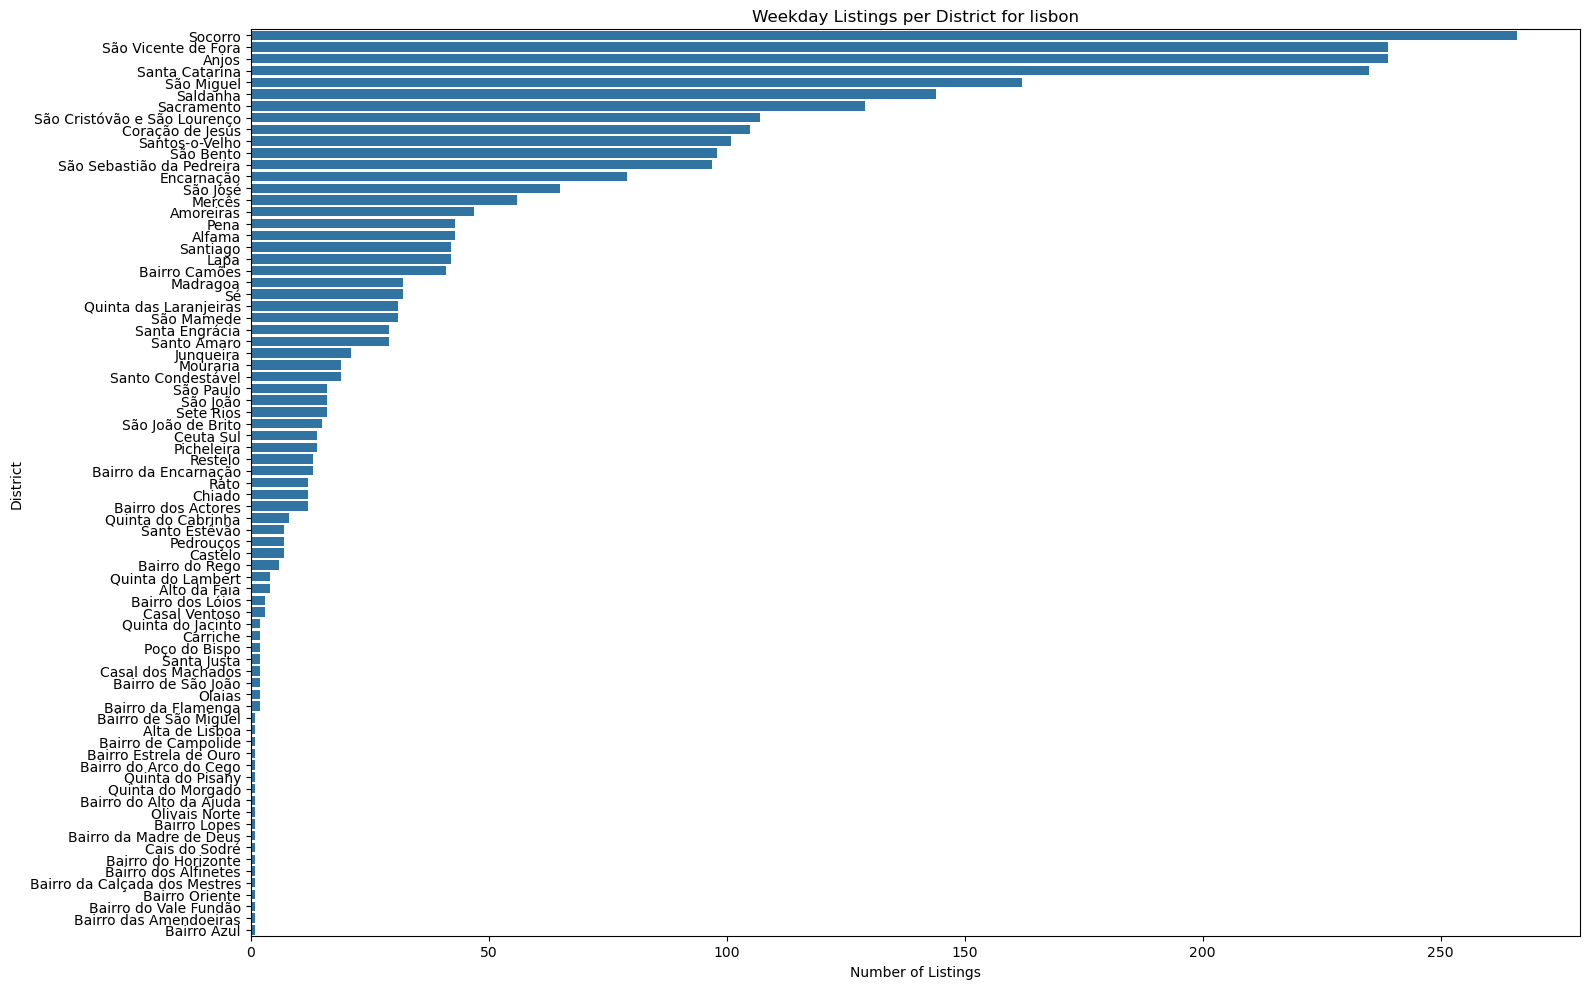

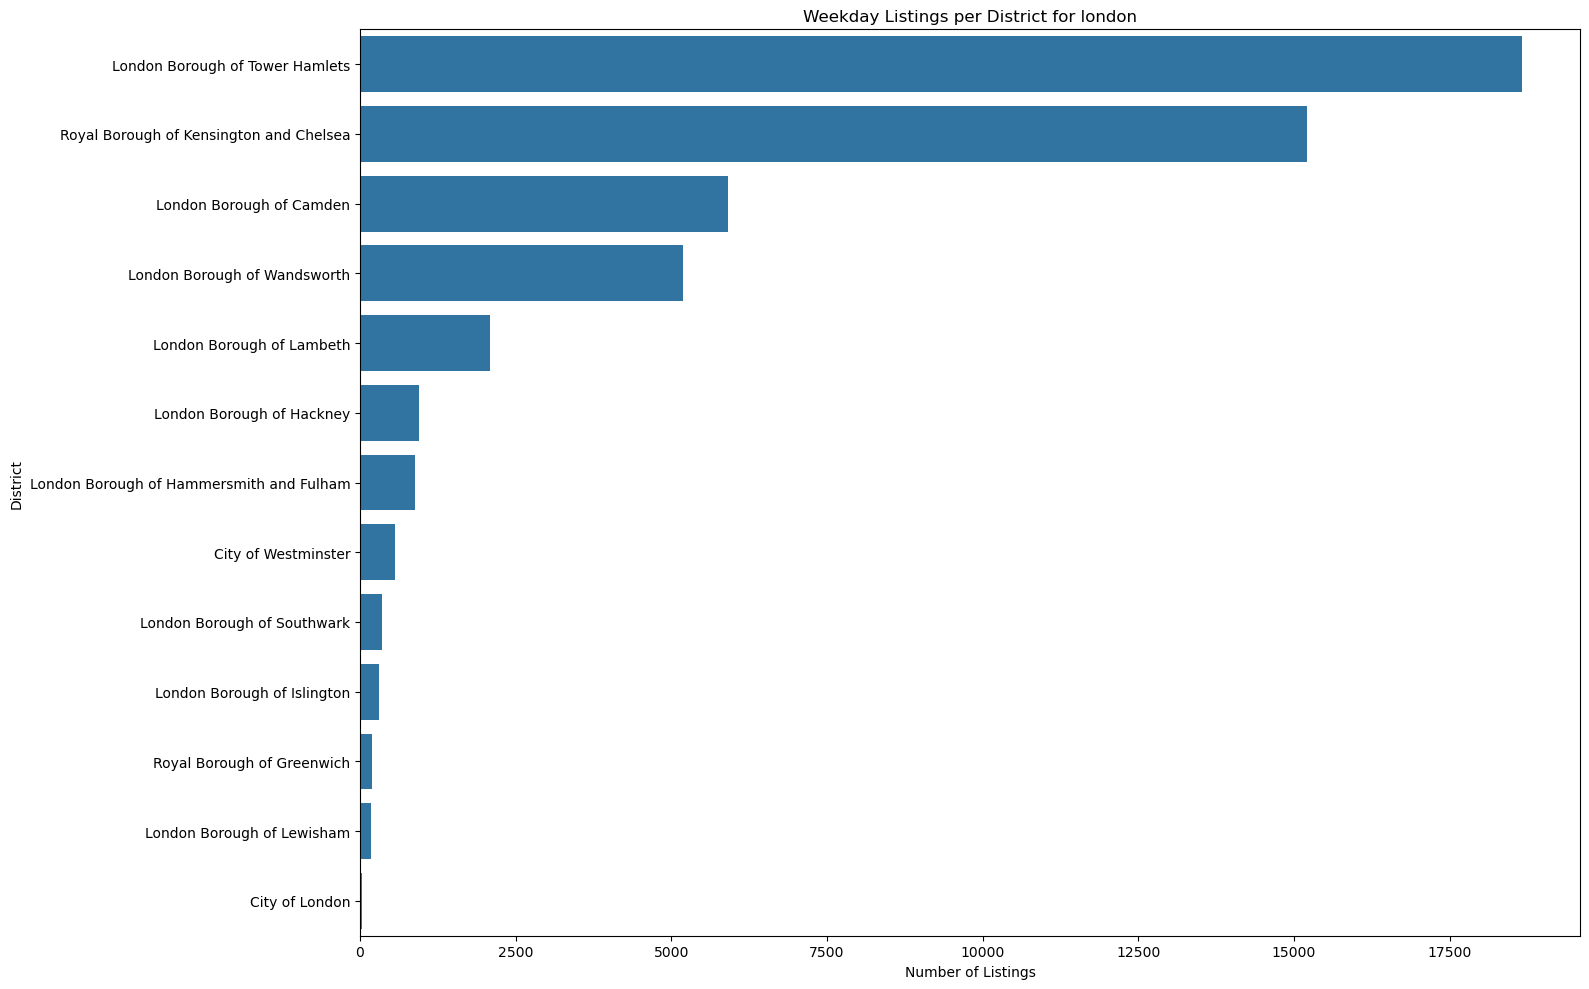

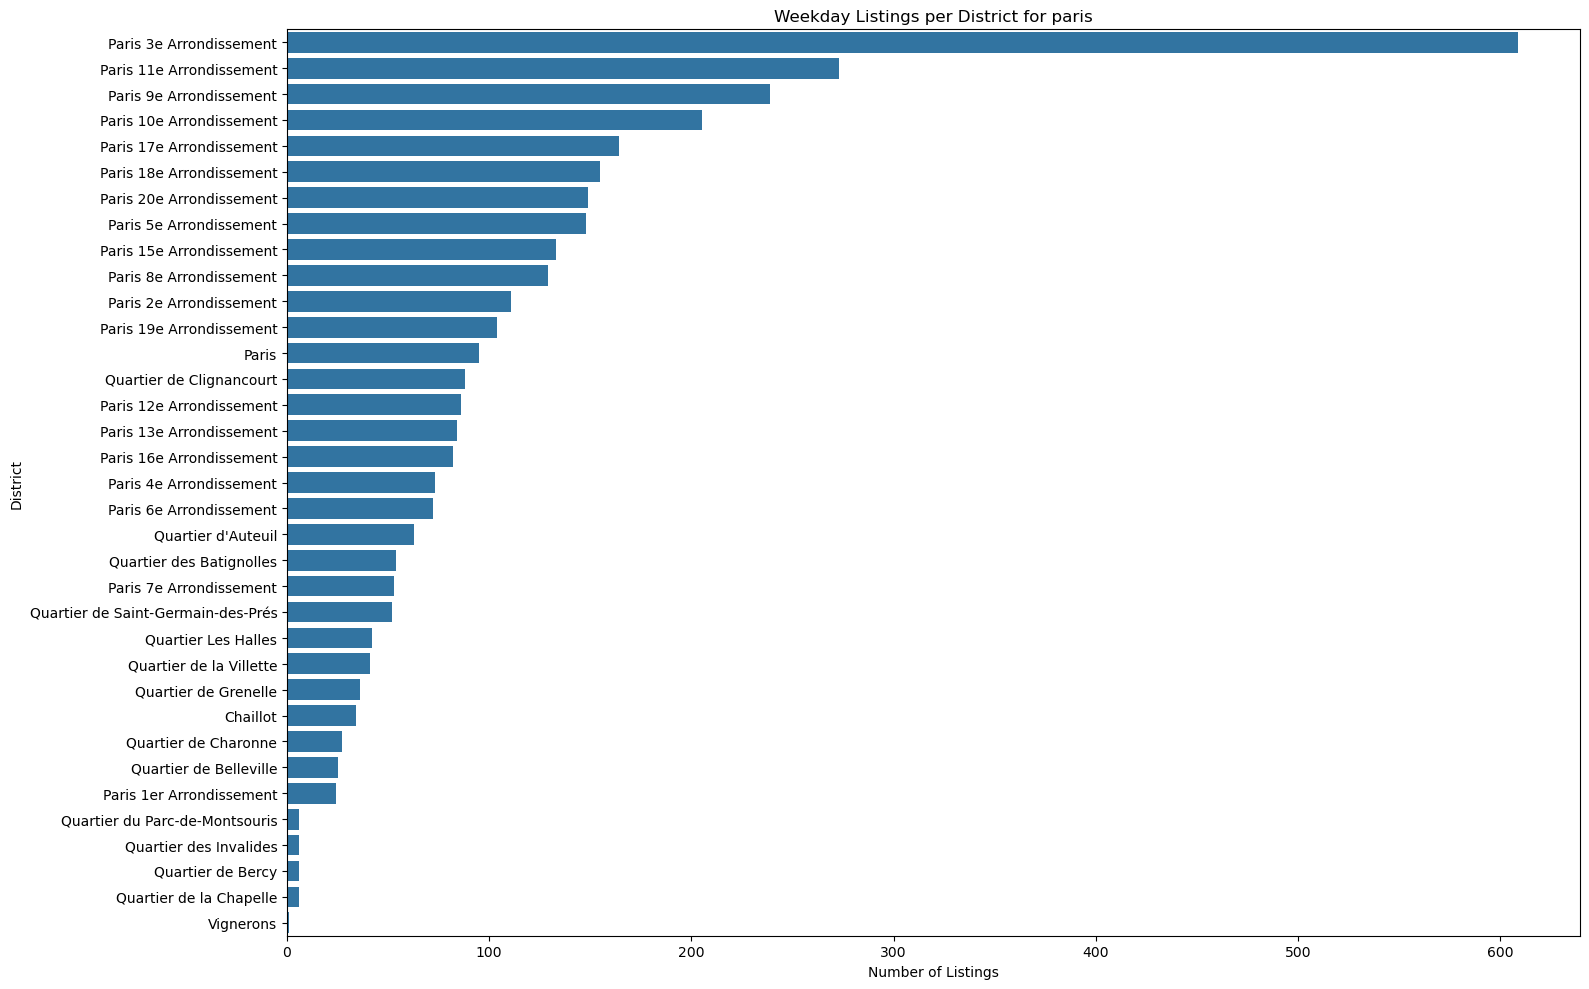

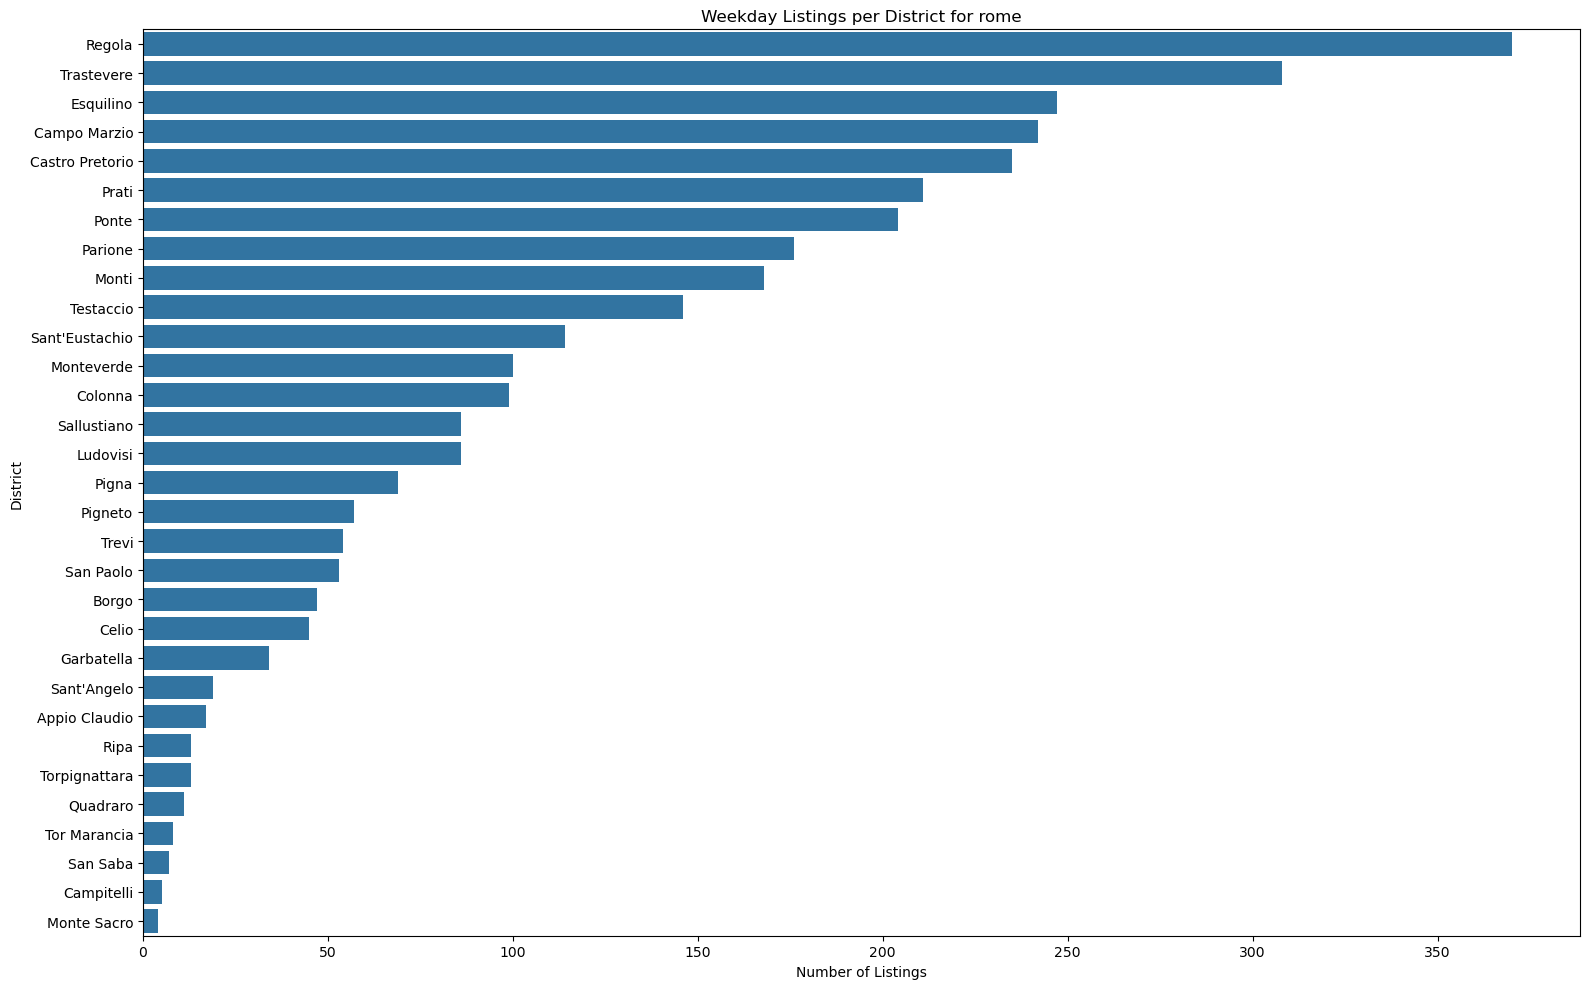

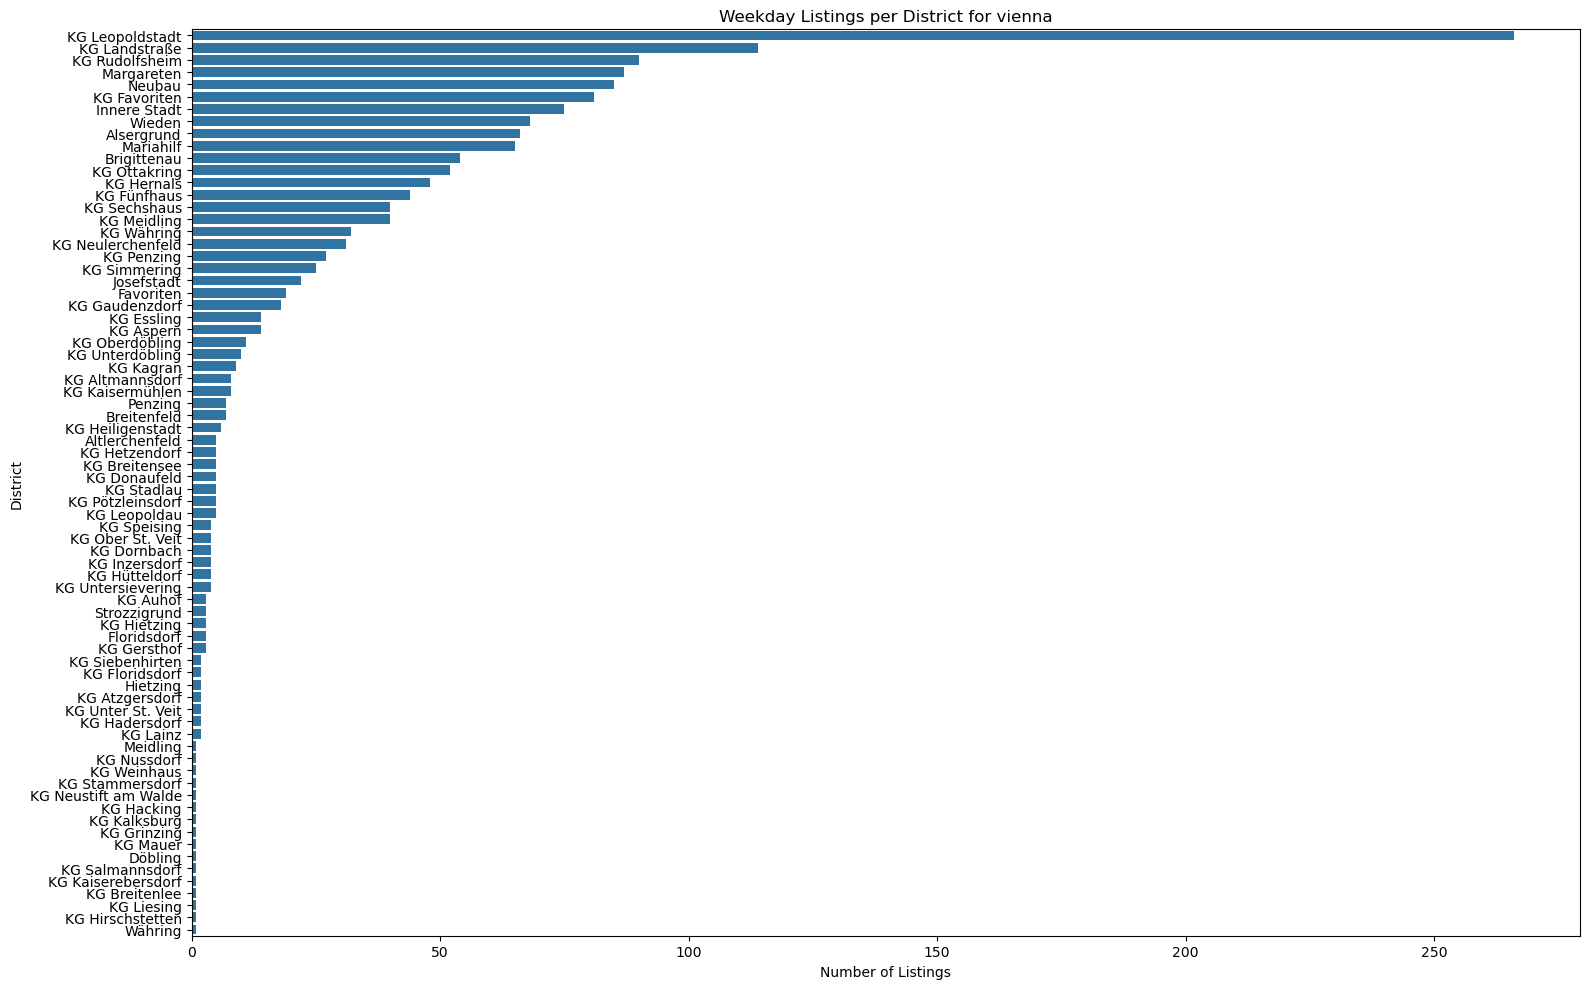

In [55]:
# Visualize the data as a bar chart for each of the Districts the number of listings for weekdays
for city in city_names:
    weekday_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekdays.csv")
    
    # Get the number of listings per district
    weekday_district_counts = weekday_city_dataset['district'].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(16, 10))
    sns.barplot(x=weekday_district_counts.values, y=weekday_district_counts.index)
    plt.title(f"Weekday Listings per District for {city}")
    plt.xlabel("Number of Listings")
    plt.ylabel("District")
    plt.tight_layout()
    plt.show()


In [56]:
# Print number of listings per district
for city in city_names:
    weekday_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekdays.csv")
    print(f"City: {city}")
    print(weekday_city_dataset['district'].value_counts())
    print("\n")

City: amsterdam
district
Centrum       202
Zuid          154
West          138
Oost           97
Nieuw-West     51
Noord          47
Zuidoost       26
Westpoort       1
Name: count, dtype: int64


City: athens
district
Ψυρρή                  216
Γκάζι                  208
Γαργαρέττα             206
Κουκάκι                161
Κυνοσάργους            118
Λυκαβηττός             113
Πλατεία Αμερικής        96
Άγιος Παντελεήμονας     91
Monastiràki             89
Μεταξουργείο            79
Σταθμός Λαρίσης         70
Ομόνοια                 61
Πλατεία Βάθης           60
Θησείο                  55
Κουντουριώτικα          46
Ακρόπολη                43
Γηροκομείο              38
Άγιος Νικόλαος          37
Κεραμεικός              34
Μουσείο                 29
Αττική                  23
Θυμαράκια               23
Αμπελόκηποι             21
Άγιος Αρτέμιος          20
Μετς                    18
Λόφος Σκουζέ            16
Προφήτης Δανιήλ         14
Φιλοπάππου              13
Γουδή                   1

## Average Price per District for Weekdays and Weekends

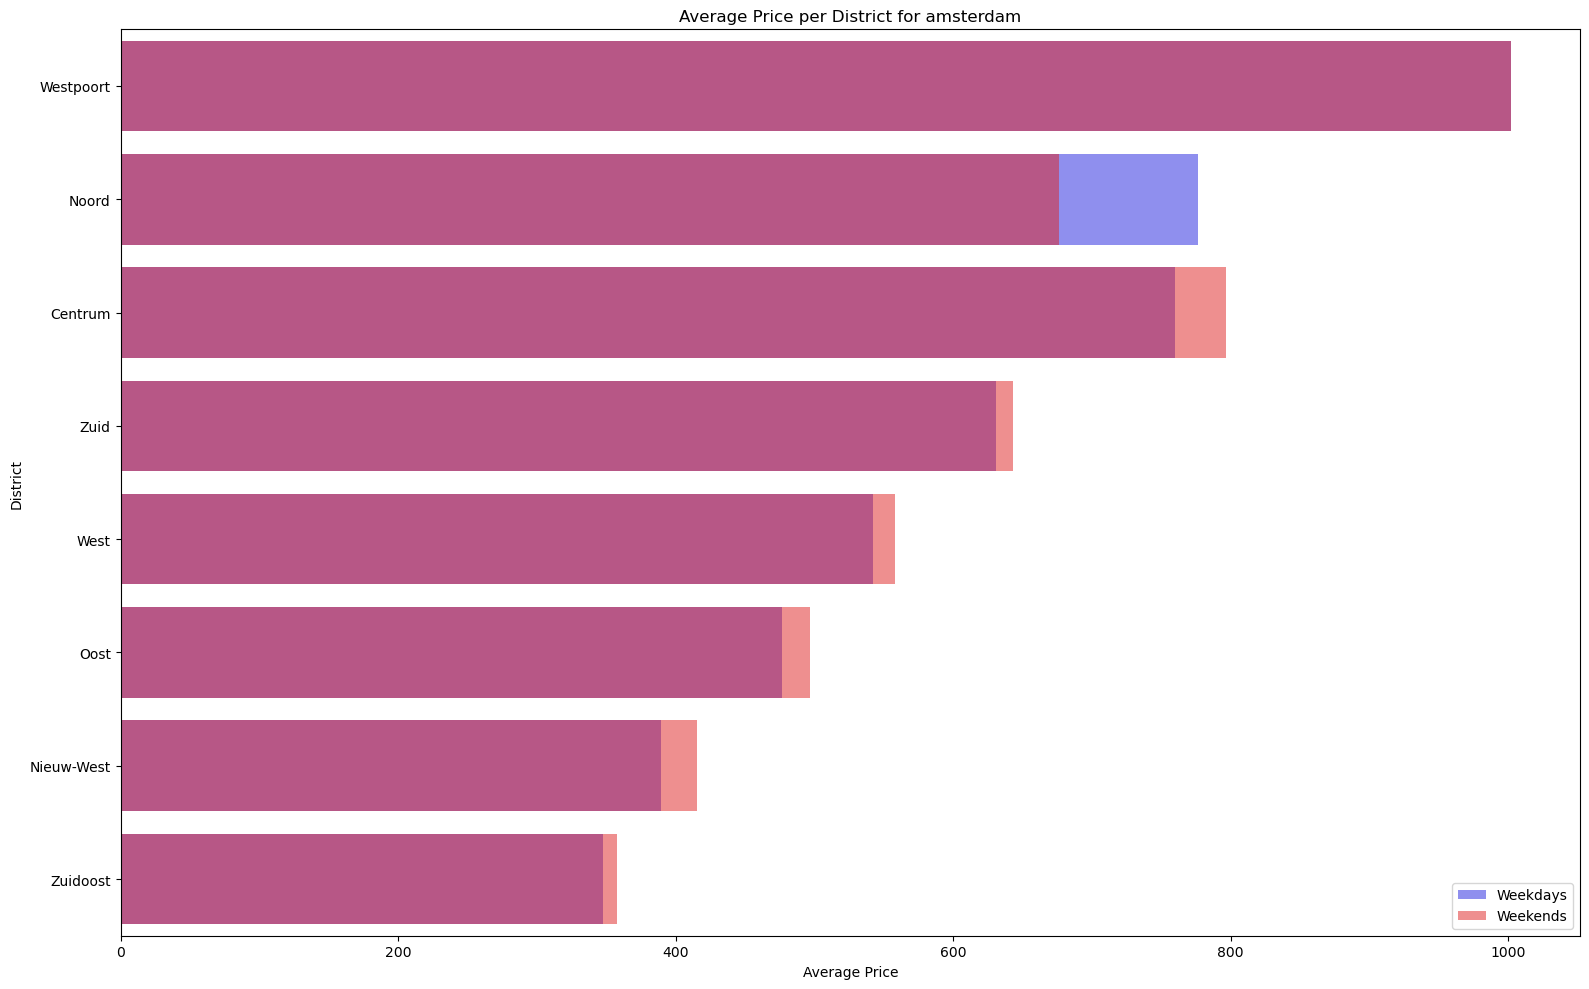

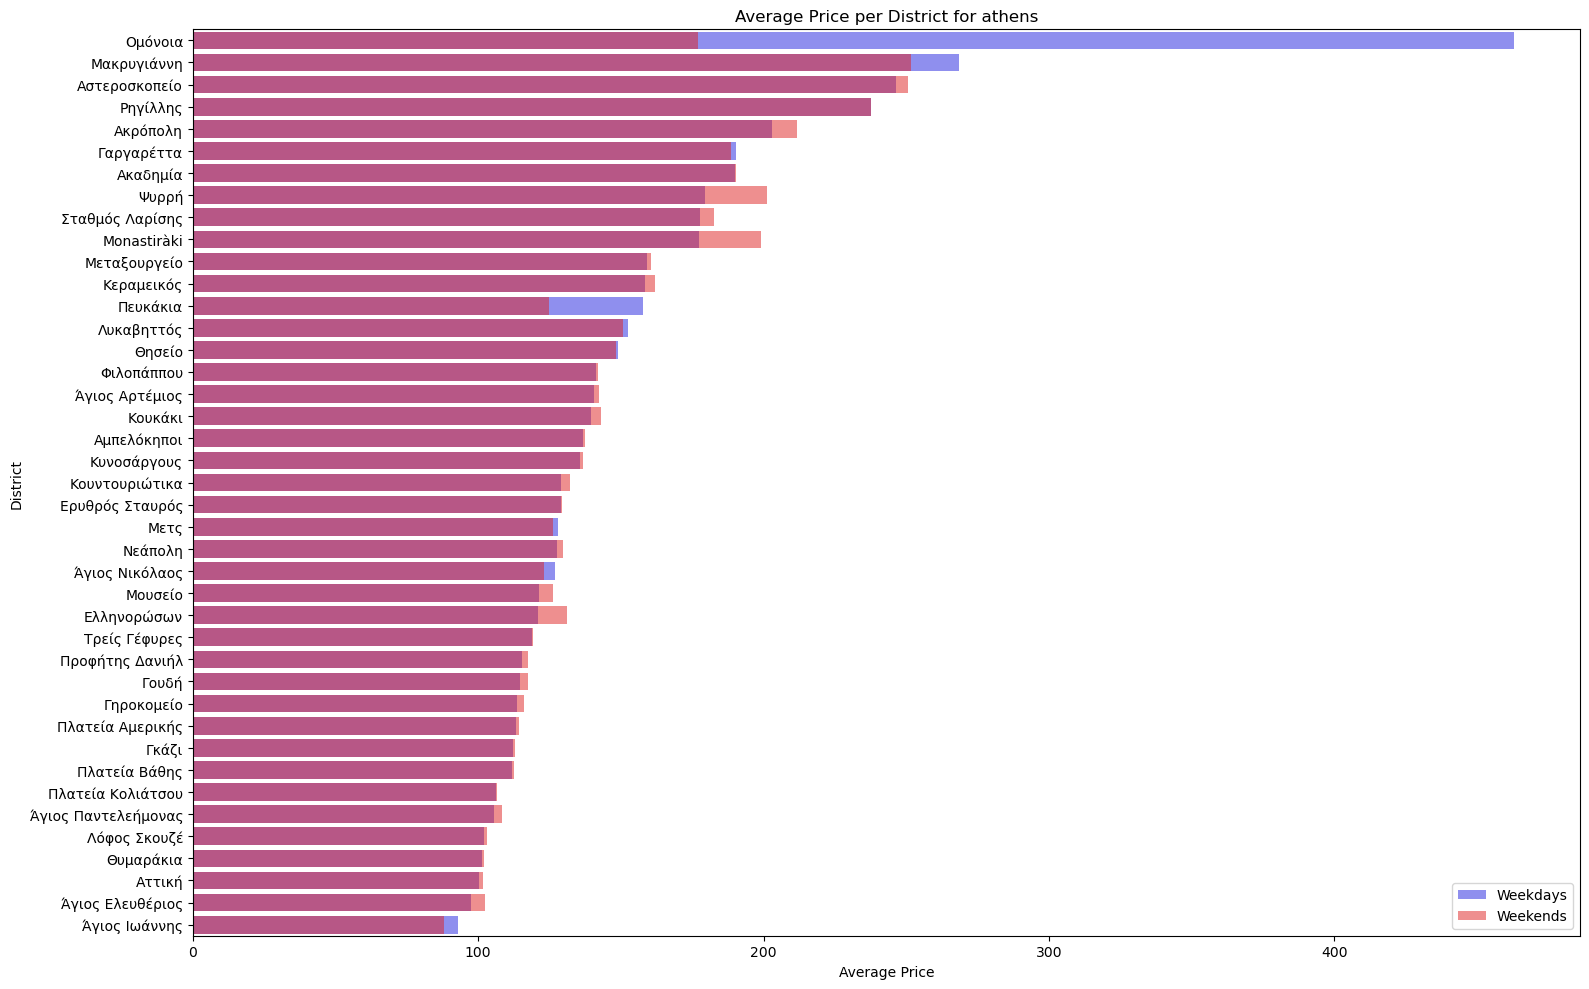

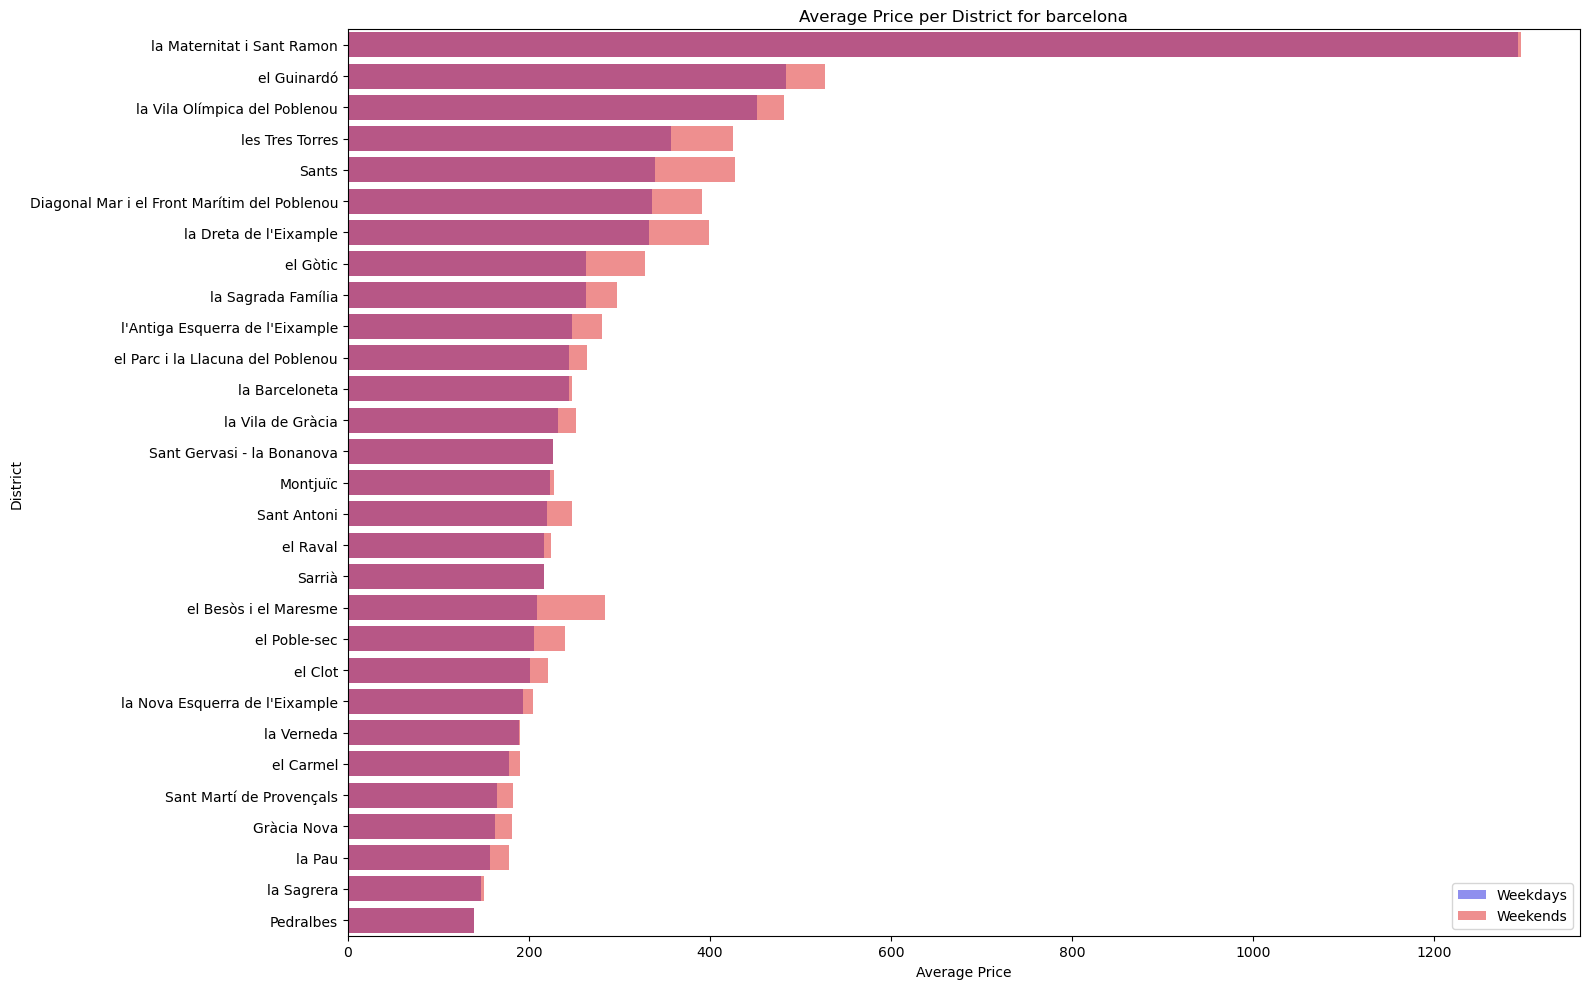

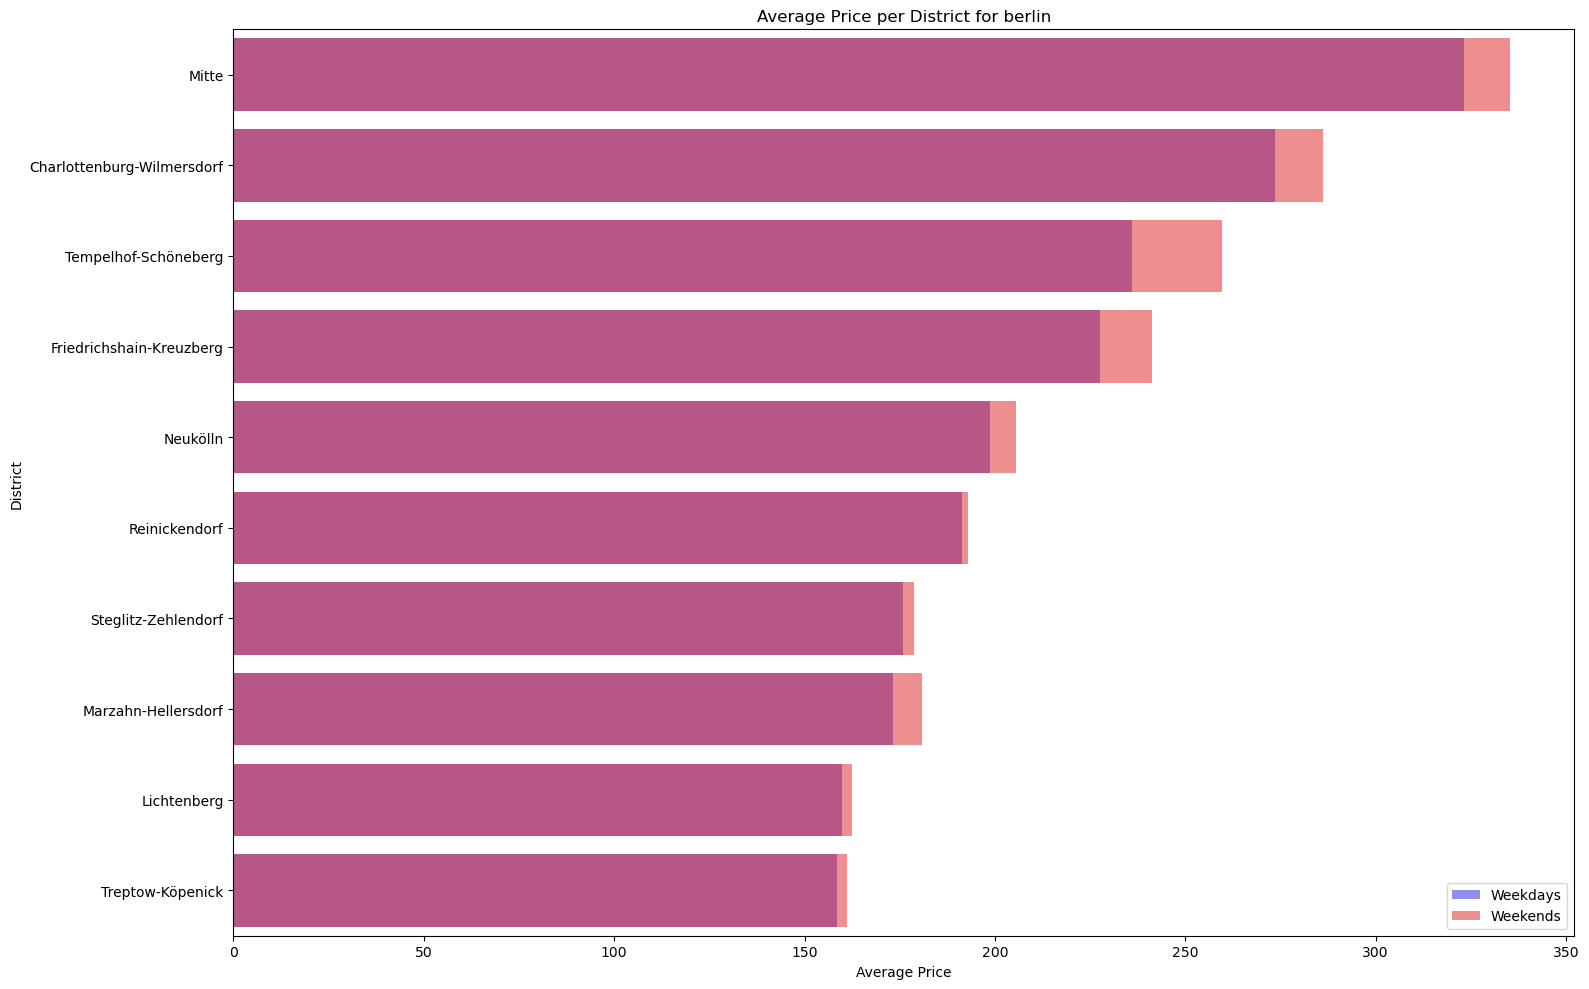

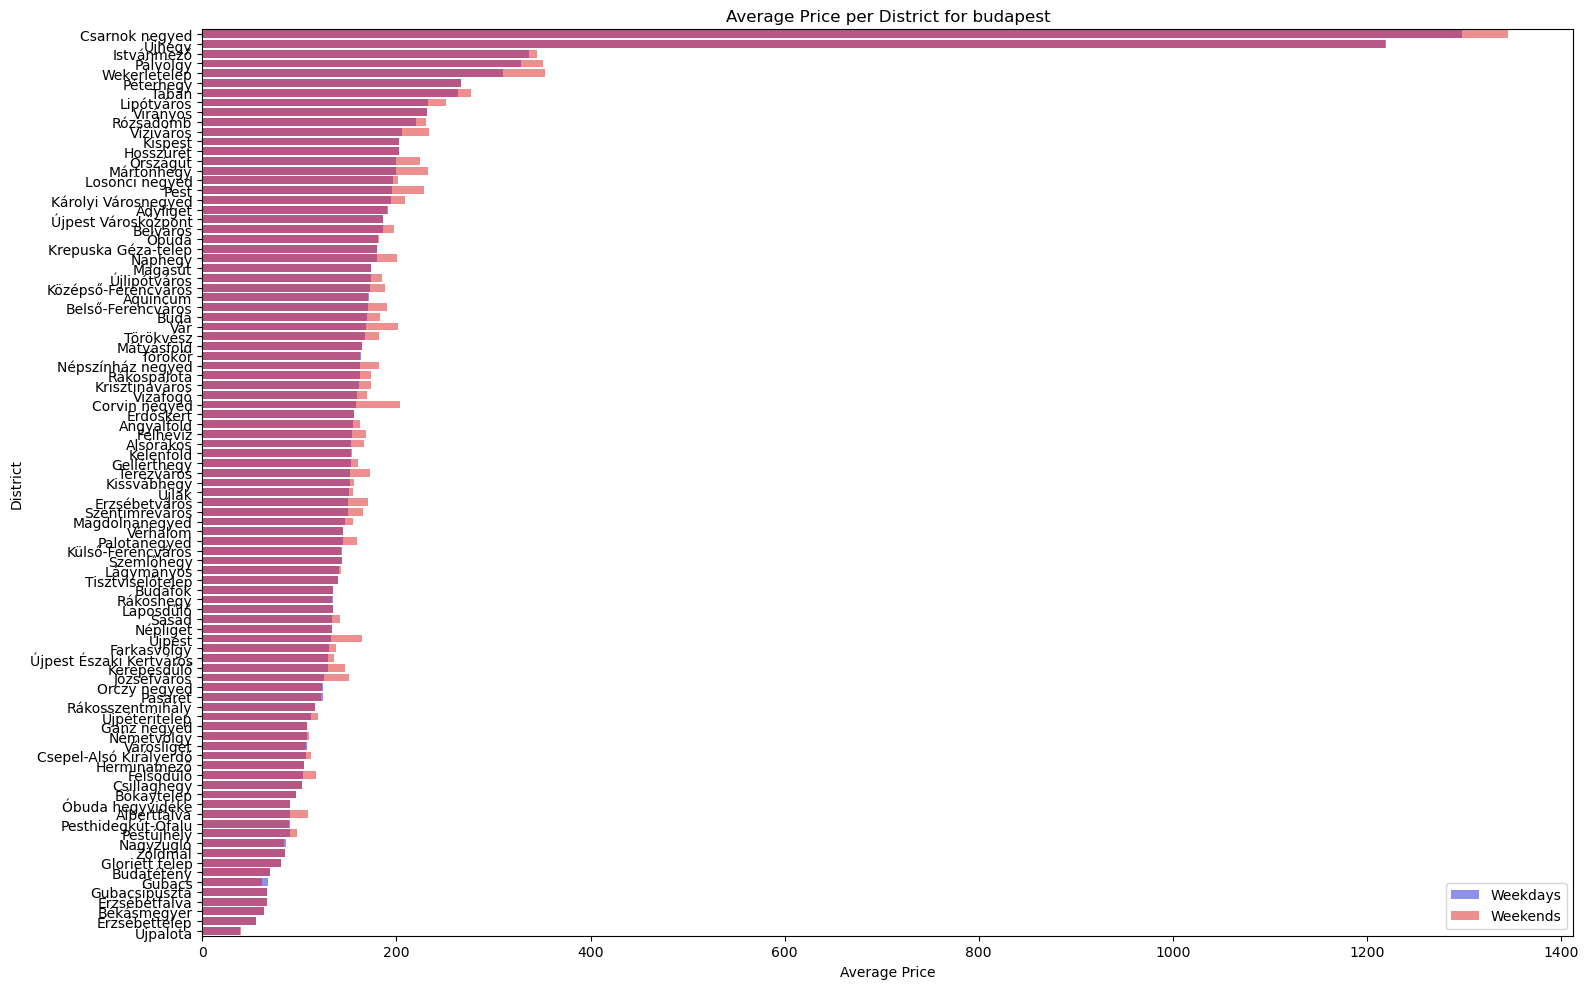

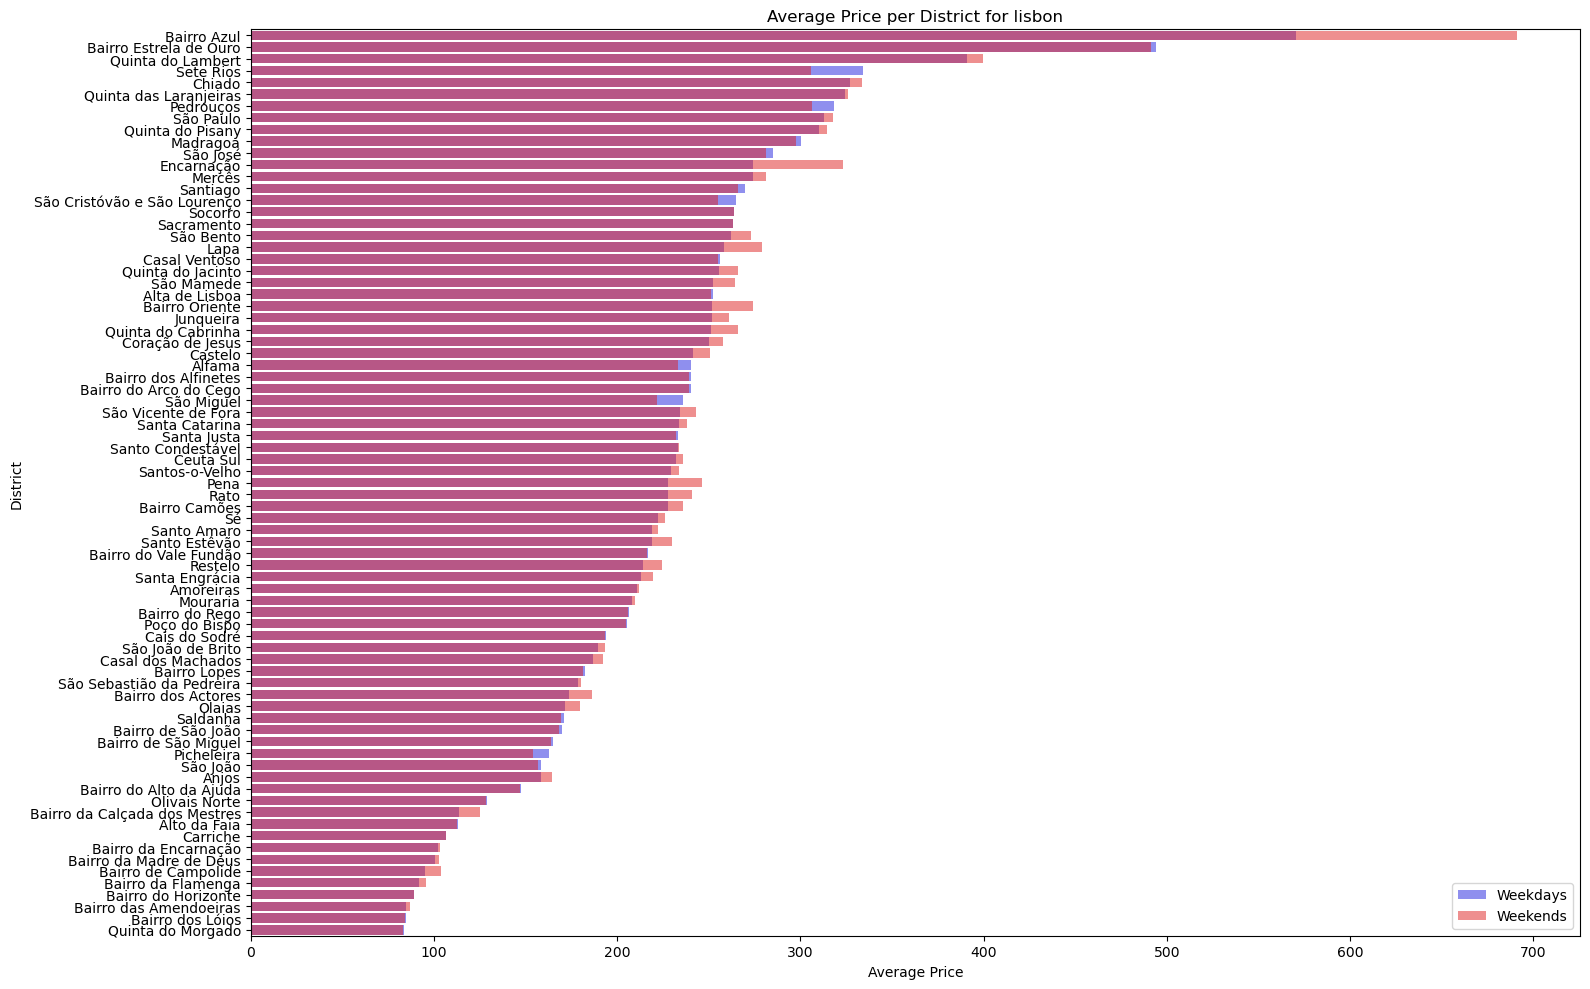

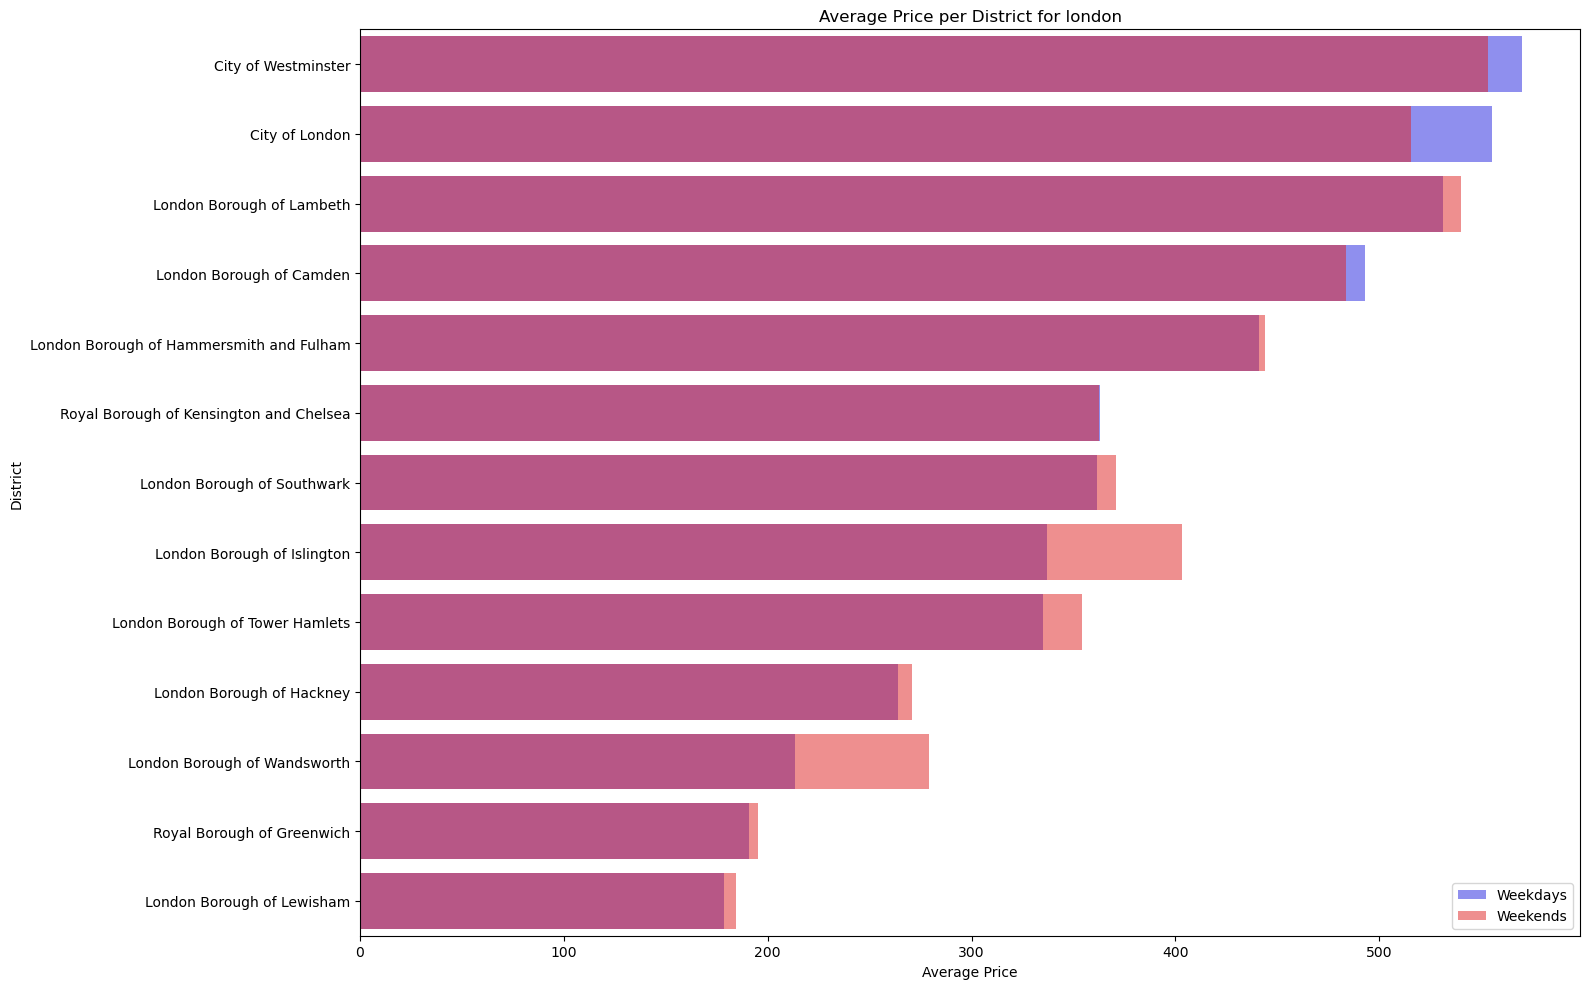

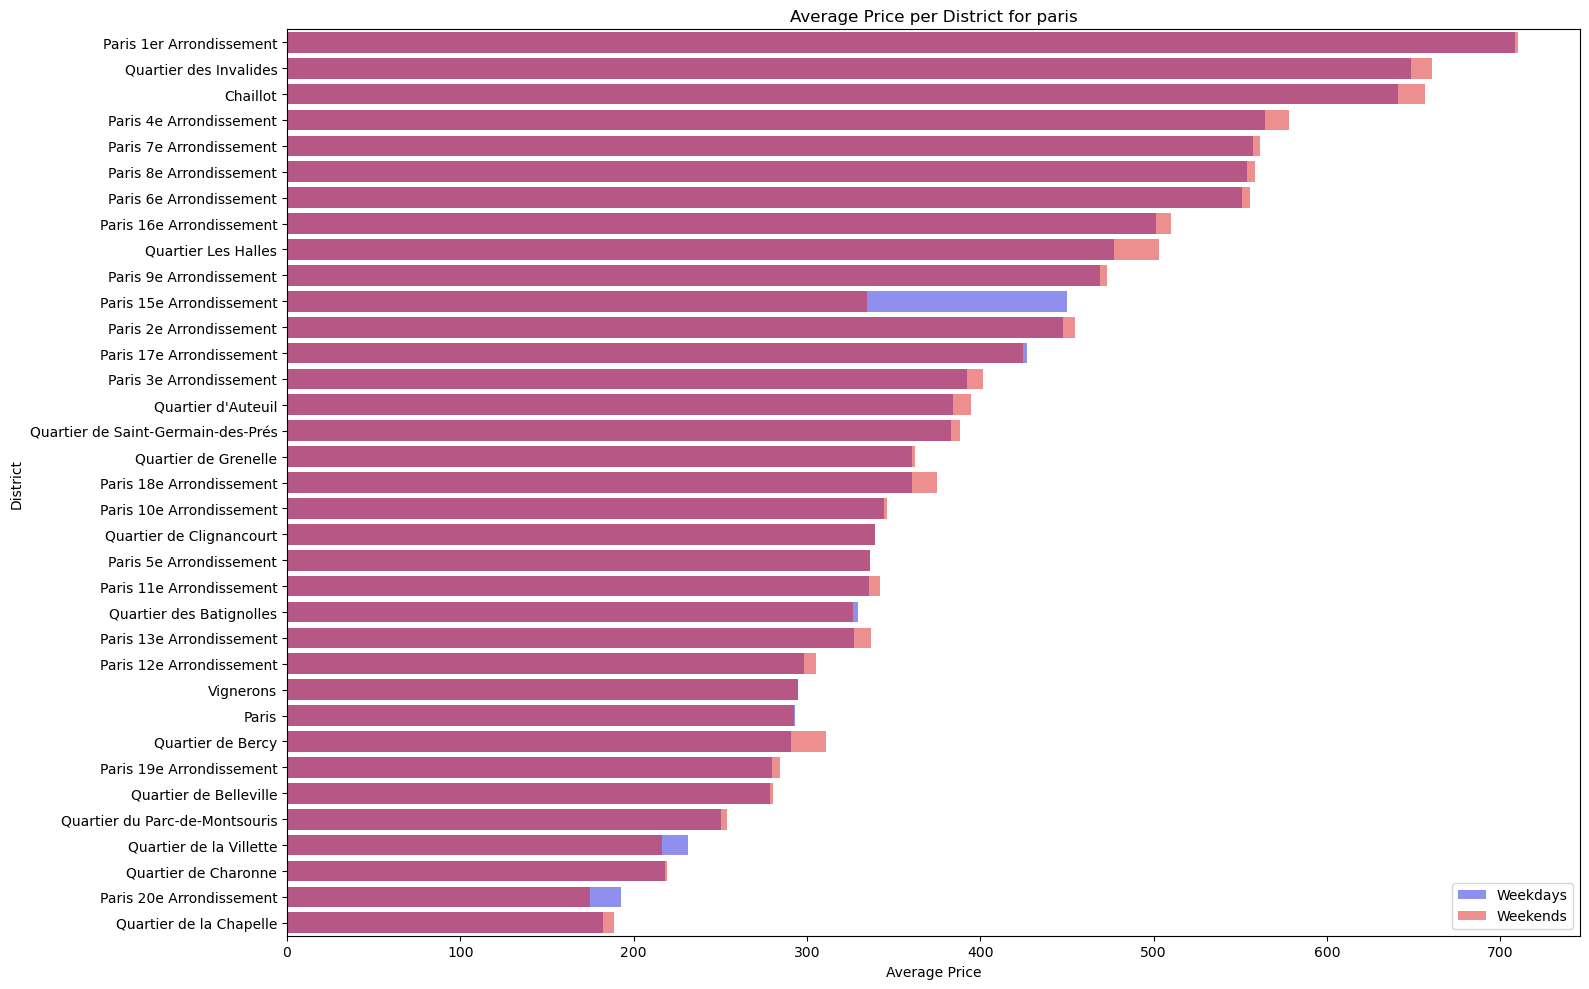

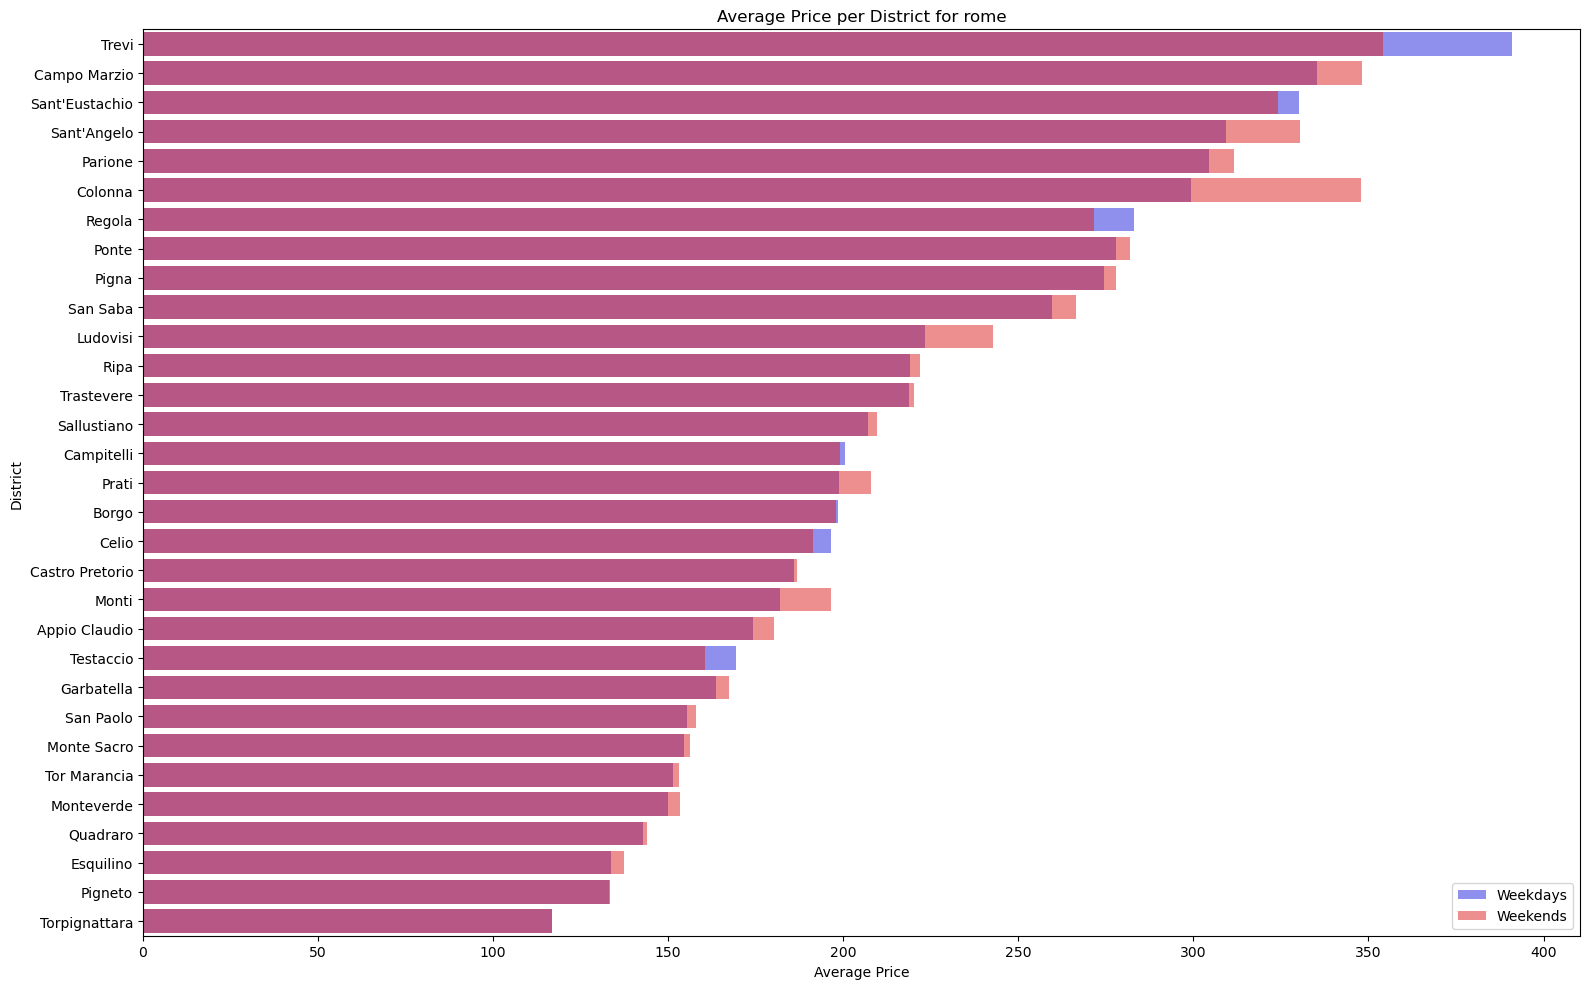

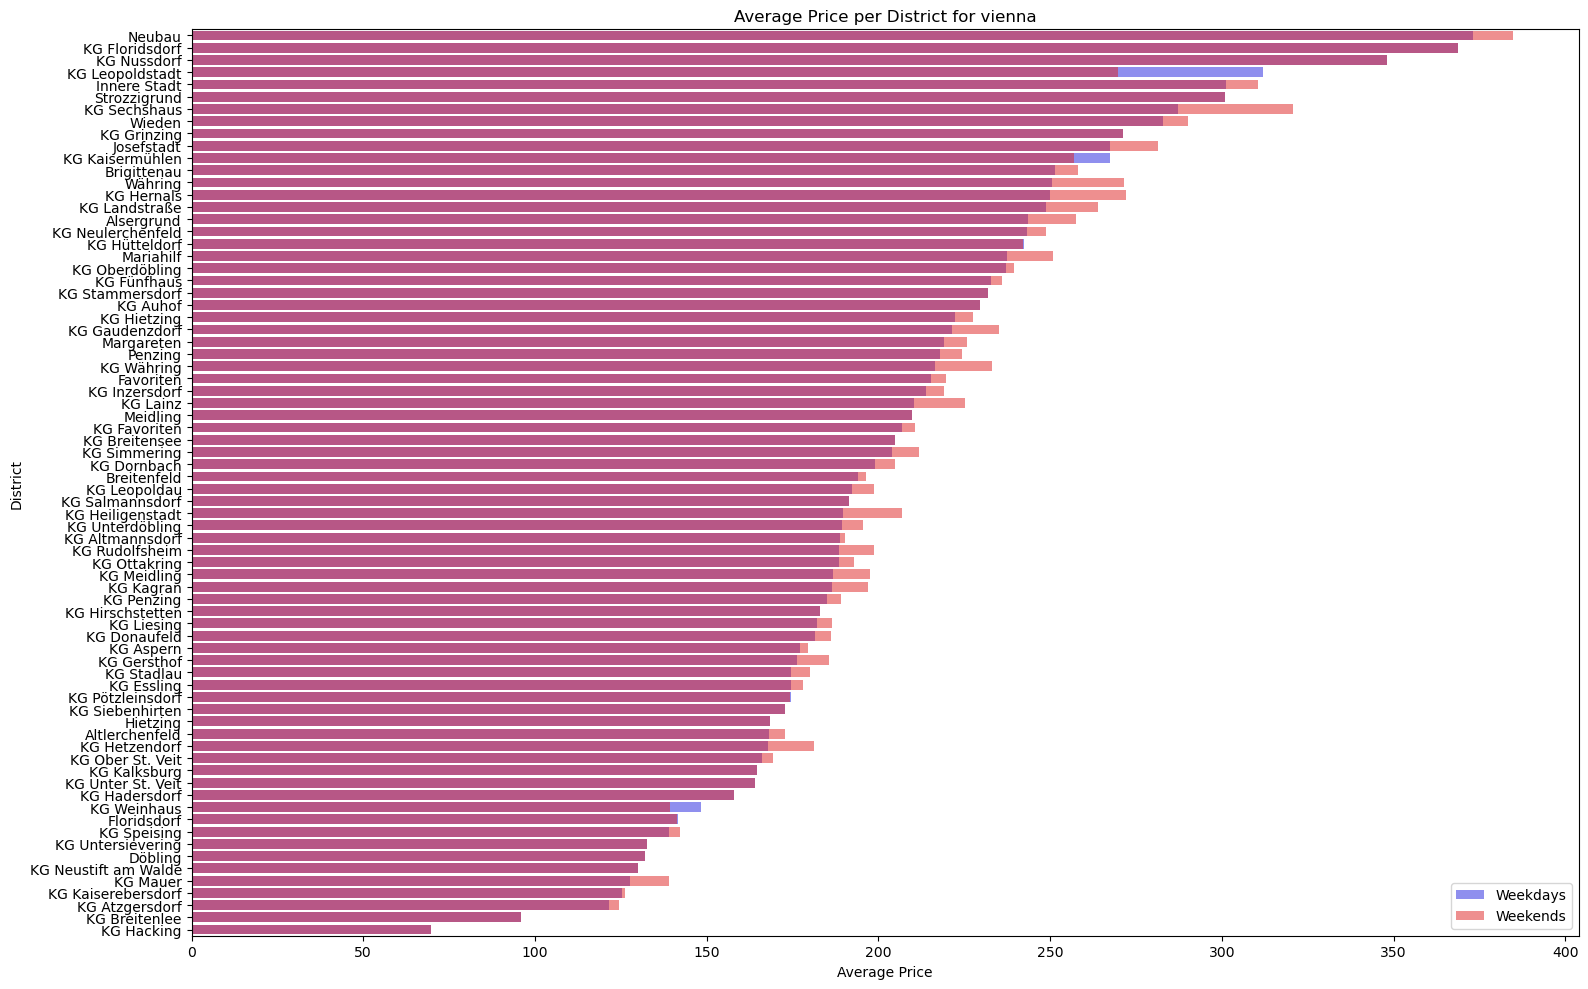

In [58]:
# Graph Average Price per District for Weekdays and Weekends.
for city in city_names:
    weekday_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekdays.csv")
    weekend_city_dataset = pd.read_csv(processed_dataset_path + city + "_weekends.csv")
    
    # Get the average price per district
    weekday_avg_price_per_district = weekday_city_dataset.groupby('district')['realSum'].mean()
    weekend_avg_price_per_district = weekend_city_dataset.groupby('district')['realSum'].mean()
    
    # Sort districts by highest weekday average price
    weekday_avg_price_per_district = weekday_avg_price_per_district.sort_values(ascending=False)
    weekend_avg_price_per_district = weekend_avg_price_per_district.reindex(weekday_avg_price_per_district.index)
    
    # Plot the bar chart
    plt.figure(figsize=(16, 10))
    sns.barplot(x=weekday_avg_price_per_district.values, y=weekday_avg_price_per_district.index, color='blue', alpha=0.5, label='Weekdays')
    sns.barplot(x=weekend_avg_price_per_district.values, y=weekend_avg_price_per_district.index, color='red', alpha=0.5, label='Weekends')
    plt.title(f"Average Price per District for {city}")
    plt.xlabel("Average Price")
    plt.ylabel("District")
    plt.legend()
    plt.tight_layout()
    plt.show()

## Get Landmarks for each City and what District it is part of

In [59]:
import requests

def get_landmarks_and_districts(city_name):
    # Base URL for Nominatim API
    base_url = "https://nominatim.openstreetmap.org/search"
    
    # Parameters for the API request
    params = {
        "cityname": city_name,
        "format": "json",
        "addressdetails": 1,
        "limit": 1  # Increase this to get more results
    }
    
    # Make the API request
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        
        landmarks = []
        
        for item in data:
            if "tourism" in item.get("class", ""):  # Filter for landmarks
                name = item.get("display_name", "Unknown Landmark")
                district = item.get("address", {}).get("suburb") or item.get("address", {}).get("city_district") or "Unknown District"
                
                landmarks.append({
                    "name": name,
                    "district": district
                })
        
        return landmarks
    else:
        print(f"Error: Unable to fetch data (Status Code: {response.status_code})")
        return []

# Example usage
city_name = "Paris"
landmarks = get_landmarks_and_districts(city_name)

if landmarks:
    print(f"Landmarks in {city_name}:")
    for landmark in landmarks:
        print(f"- {landmark['name']} (District: {landmark['district']})")
else:
    print("No landmarks found.")

Error: Unable to fetch data (Status Code: 403)
No landmarks found.
